## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# INTRODUCTION

## Business Statements

## Data Source

### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Methodology

# DATA SCRUBBING

1. Casting columns to the appropriate data types
2. Identifying and dealing with null and duplicated values appropriately
3. Removing columns that aren't required for modeling
4. Checking for and dealing with multicollinearity
5. Normalizing the data

In [1624]:
#import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1849]:
#load dataset and view the first 5 rows
kc_house = pd.read_csv('./Data & Figures/kc_house_data.csv')
kc_house.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [1827]:
#get all column names
kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [1828]:
#review number of rows and columns
kc_house.shape

(21597, 21)

There are 21597 samples and 21 features for each.

In [1829]:
#look at all columns together with their datatype
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Observation:**
* 'sqft_basement' datatye should be float
* 'date', 'yr_built', 'yr_renovated' should be in datetime object

### Deal with duplicates

In [1629]:
#check to see if 'id' is unique identifier for each sample
kc_house['id'].nunique()

21420

There are 21597 sample while 'id' has only 21420 counts, which means there are duplicates in the 'id' columns.

In [1630]:
#get sum of duplicates
kc_house['id'].duplicated().sum()

177

In [1631]:
#drop duplicates and only keep the most current data
kc_house = kc_house.sort_values('id', ascending = False).drop_duplicates(subset = 'id', keep = 'first')

In [1632]:
#check again
kc_house['id'].duplicated().sum()

0

In [1633]:
#recheck dataframe shape
kc_house.shape

(21420, 21)

In [1634]:
#drop the entire 'id' since we already dealt with its duplicates and we don't need it anymore
kc_house.drop('id', axis = 1, inplace = True)
kc_house.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  10/30/2014  268950.0         3       1.00         1320      8100   
20963    7/3/2014  399900.0         2       1.75         1410      1005   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
15937     1.0         0.0   0.0          3      6         880         440.0   
20963     1.5         0.0   0.0          3      9         900         510.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15937      1943           NaN    98166  47.4697 -122.351           1000   
20963      2011           0.0    98027  47.5446 -122.018           1440   

       sqft_lot15  
15937        8100  
20963        1188

### Deal with missing values

In [1635]:
#check for null values
kc_house.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2351
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3807
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**'waterfront'**

In [1636]:
#check out 'waterfront'
print(kc_house['waterfront'].nunique())

kc_house['waterfront'].value_counts()

2


0.0    18923
1.0      146
Name: waterfront, dtype: int64

In [1637]:
#calculate how big a percentage of the missing values in 'waterfront' from the whole dataset is
((kc_house['waterfront'].isnull().sum()) / (len(kc_house)) * 100).round(2)

10.98

In [1638]:
#assuming that missing values in 'waterfront' is the absence of waterfront, we'll replace it with value of 0 since the majority of data falls under this value
kc_house['waterfront'] = kc_house['waterfront'].fillna(0)

#check again
kc_house['waterfront'].isnull().sum()

0

**'view'**

In [1639]:
#calculate how big a percentage of the missing values in 'view' from the whole dataset is
((kc_house['view'].isnull().sum()) / (len(kc_house)) * 100).round(2)

0.29

In [1640]:
#'view' is number of times a house is viewed with the majority of the house has not been viewed 
#this is not a feature we are interested in and it provides no useful information 
#drop 'view'
kc_house.drop('view', axis = 1, inplace = True)
kc_house.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  10/30/2014  268950.0         3       1.00         1320      8100   
20963    7/3/2014  399900.0         2       1.75         1410      1005   

       floors  waterfront  condition  grade  sqft_above sqft_basement  \
15937     1.0         0.0          3      6         880         440.0   
20963     1.5         0.0          3      9         900         510.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15937      1943           NaN    98166  47.4697 -122.351           1000   
20963      2011           0.0    98027  47.5446 -122.018           1440   

       sqft_lot15  
15937        8100  
20963        1188

**'yr_renovated'**

In [1641]:
#check out 'yr_renovated'
print(kc_house['yr_renovated'].nunique())

kc_house['yr_renovated'].value_counts()

70


0.0       16873
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1976.0        1
1951.0        1
1971.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [1642]:
#calculate how big a percentage of the missing values in 'yr_renovated' from the whole dataset is
((kc_house['yr_renovated'].isnull().sum()) / (len(kc_house)) * 100).round(2)

17.77

In [1643]:
#take a look at the missing data
kc_house[kc_house['yr_renovated'].isnull()].head(5)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  10/30/2014  268950.0         3        1.0         1320      8100   
7614    6/24/2014  339000.0         3        1.0         1100      4128   
4675    6/26/2014  670000.0         3        1.5         1490      4400   
1714    5/14/2014  800000.0         3        1.0         1700      4400   
10382    1/7/2015  575000.0         4        2.0         1810      4400   

       floors  waterfront  condition  grade  sqft_above sqft_basement  \
15937     1.0         0.0          3      6         880         440.0   
7614      1.0         0.0          4      7         720         380.0   
4675      1.5         0.0          4      7        1490           0.0   
1714      1.5         0.0          4      8        1700           0.0   
10382     2.0         0.0          3      8        1700         110.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15937      1943           NaN    98166  47.4697 -122.351           1000   
7614       1942           NaN    98126  47.5296 -122.379           1510   
4675       1906           NaN    98122  47.6113 -122.292           1560   
1714       1906           NaN    98122  47.6120 -122.292           1610   
10382      1909           NaN    98122  47.6132 -122.292           1470   

       sqft_lot15  
15937        8100  
7614         4538  
4675         4400  
1714         4180  
10382        4400

 We are going to drop the entire column of 'yr_renovated' because although there is only ~18% of data is NaN, when taking a look at value count, we see that the bulk of data fall into 0.0.

In [1644]:
#calculate percentage of 'yr_renovated' == 0.0
((len(kc_house[kc_house['yr_renovated'] == 0.0]) / len(kc_house)) * 100)

78.77217553688142

In [1645]:
#since the majority of 'yr_renovated' is 0.0, replace NaN with 0
kc_house['yr_renovated'] = kc_house['yr_renovated'].fillna(0)

#check again
kc_house['yr_renovated'].isnull().sum()

0

### Correct datatypes

**'sqft_basement'**

In [1646]:
#check out the 'sqft_basement' feature
kc_house['sqft_basement'].sort_values(ascending = True)

2495     0.0
5809     0.0
7739     0.0
19408    0.0
12796    0.0
        ... 
9442       ?
5765       ?
17113      ?
1476       ?
6325       ?
Name: sqft_basement, Length: 21420, dtype: object

We see that the '?' prevents us from correcting 'sqft_basement' to 'float64'. We need to fix this first.

In [1647]:
len(kc_house[kc_house['sqft_basement'] == '?'])

452

In [1648]:
#calculate 'sqft_basement' = 'sqft_living' - 'sqft_above'
for i in list(kc_house[kc_house['sqft_basement'] == '?'].index.values): 
    kc_house.loc[i, 'sqft_basement'] = kc_house.loc[i, 'sqft_living'] - kc_house.loc[i, 'sqft_above']

In [1649]:
#check again
kc_house[kc_house['sqft_basement'] == '?']

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In [1650]:
#correct 'sqft_basement' to float
kc_house['sqft_basement'] = kc_house['sqft_basement'].astype('float64')

#check
kc_house['sqft_basement'].dtypes

dtype('float64')

**'date'**

In [1651]:
#check to see if 'date' is a datetime object
import datetime

isinstance(kc_house['date'][0], datetime.date)

False

In [1652]:
#convert 'date' to a datetime object
kc_house['date'] = pd.to_datetime(kc_house['date'])

#check again
isinstance(kc_house['date'][0], datetime.date)

True

# EXPLORE DATA 

Once you've the cleaned data, you'll then do some further EDA (Exploratory Data Analysis) to check out the distributions of the various columns, examine the descriptive statistics for the dataset, and to create some initial visualizations to better understand the dataset.

* Visualizing Distributions - Histograms .hist()
* Visualizing Distributions - Kernel Density Estimation (KDE) Plots
        * jointplot sns.jointplot(x= <column>, y= <column>, data=<dataset>, kind='reg')

In [1653]:
#get data summary statistics
kc_house.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.142000e+04  21420.000000  21420.000000  21420.000000  2.142000e+04   
mean   5.412725e+05      3.373950      2.118429   2083.132633  1.512804e+04   
std    3.677194e+05      0.925405      0.768720    918.808412  4.153080e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.237250e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.614000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069050e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  21420.000000  21420.000000  21420.000000  21420.000000  21420.000000   
mean       1.495985      0.006816      3.410784      7.662792   1791.170215   
std        0.540081      0.082280      0.650035      1.171971    828.692965   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1200.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2220.000000   
max        3.500000      1.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated      zipcode           lat  \
count   21420.000000  21420.000000  21420.000000  21420.00000  21420.000000   
mean      291.962418   1971.092997     68.956723  98077.87437     47.560197   
std       442.875502     29.387141    364.552298     53.47748      0.138589   
min         0.000000   1900.000000      0.000000  98001.00000     47.155900   
25%         0.000000   1952.000000      0.000000  98033.00000     47.471200   
50%         0.000000   1975.000000      0.000000  98065.00000     47.572100   
75%       560.000000   1997.000000      0.000000  98117.00000     47.678100   
max      4820.000000   2015.000000   2015.000000  98199.00000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21420.000000   21420.000000   21420.000000  
mean    -122.213784    1988.384080   12775.718161  
std        0.140791     685.537057   27345.621867  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2370.000000   10086.250000  
max     -121.315000    6210.000000  871200.000000

After acquiring and exploring your data (including cleaning it up), you'll then go on to model said data using the regression techniques you learned about earlier. With this, recall that there are four main assumptions underlying a linear regression model.

1. Linearity
With linear models, the target variable is being modeled as a linear combination of the independent variables. As such, there should be a linear relationship between the target variable and the various features being used. If the rate of change between the target variable and one of the features is non-linear and displays other characteristics such as an exponential acceleration, then prior transformations of the data are necessary before applying a regression model.

2. Normality
With linear models, the errors (residuals) from the model are assumed to be normally distributed. A good heuristic to initially check for this is to use a Q-Q plot.

3. Homoscedasticity
Along with the assumption of normal distribution, error terms should also not be correlated with the target variable or other features within the model. If errors indeed appear to be random and there are no discernible trends, then the errors are said to be homoscedastic. Looking at a simple plot of residuals against the target variable or other feature is generally sufficient to gauge this.

4. Independence
Finally, regression models assume that the various independent features feeding into the model are independent. You'll take a further look at this in this section and investigate how to check for multicollinearity. Multicollinearity is when a variable can be predicted with substantial accuracy by a separate set of features. Previously, you've examined multicollinearity in the context of the "dummy variable trap" and the two variable case. It's unwise to include two features in a regression model that are highly correlated. Similarly, in a multivariate case, having a set of features that can effectively predict another independent feature can be problematic. Such phenomenon will not reduce the overall accuracy of the model, but will severely impede interpretation as coefficient weights of the model become unstable so it is difficult or impossible to determine which features are most influential.



## Initial Observation of Data

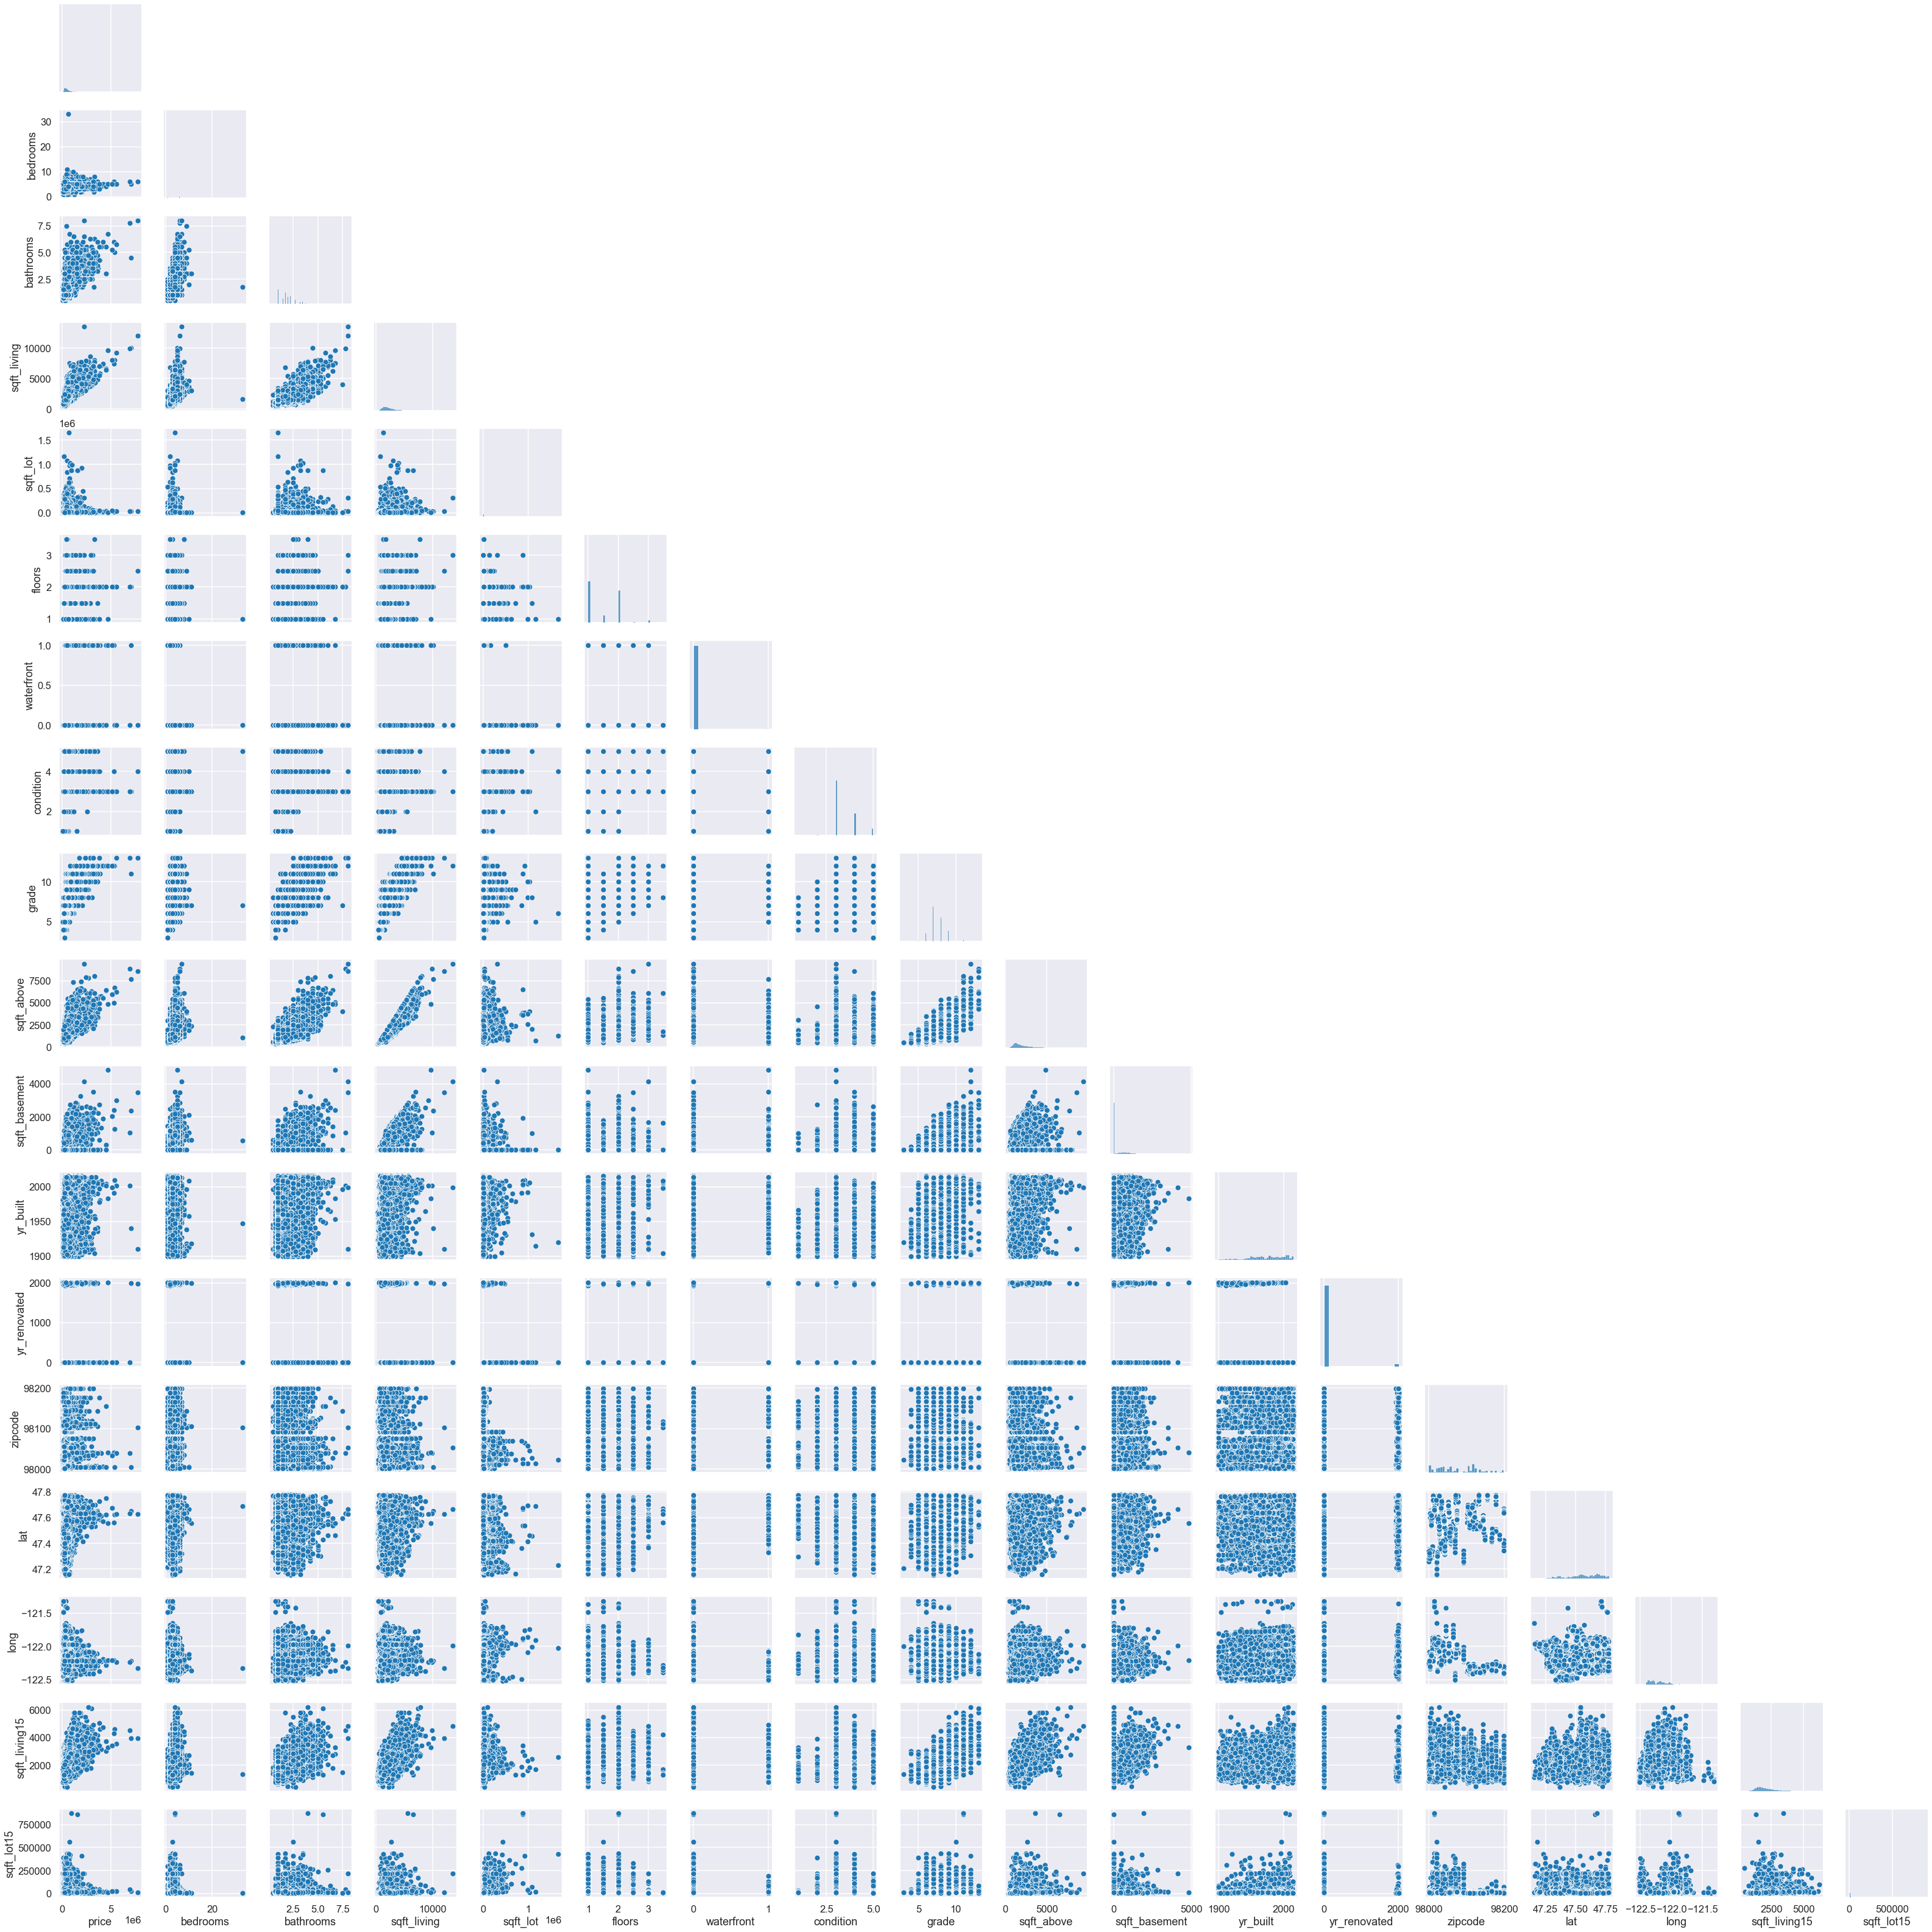

In [1654]:
#quickly scan for linearity
sns.pairplot(kc_house, diag_kind = 'hist', corner = True)

In [1655]:
#save
plt.savefig('./Data & Figures/all_pairplot')

<Figure size 432x288 with 0 Axes>

**Observation:** Quick scan for linearity
* 'sqft_living' vs. 'price', 'sqft_living' vs. 'bathrooms', 'sqft_living' vs. 'sqft_above', 'sqft_living' vs. 'sqft_living15'
* 'sqft_above' vs. 'grade'
* 'sqft_living15' vs. 'grade', 'sqft_living15' vs. 'sqft_above'
* 'price' vs. 'bedrooms', 'price' vs. 'bathrooms', 'price' vs. 'grade', 'price' vs. 'sqft_above', 'price' vs. 'sqft_living15'

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

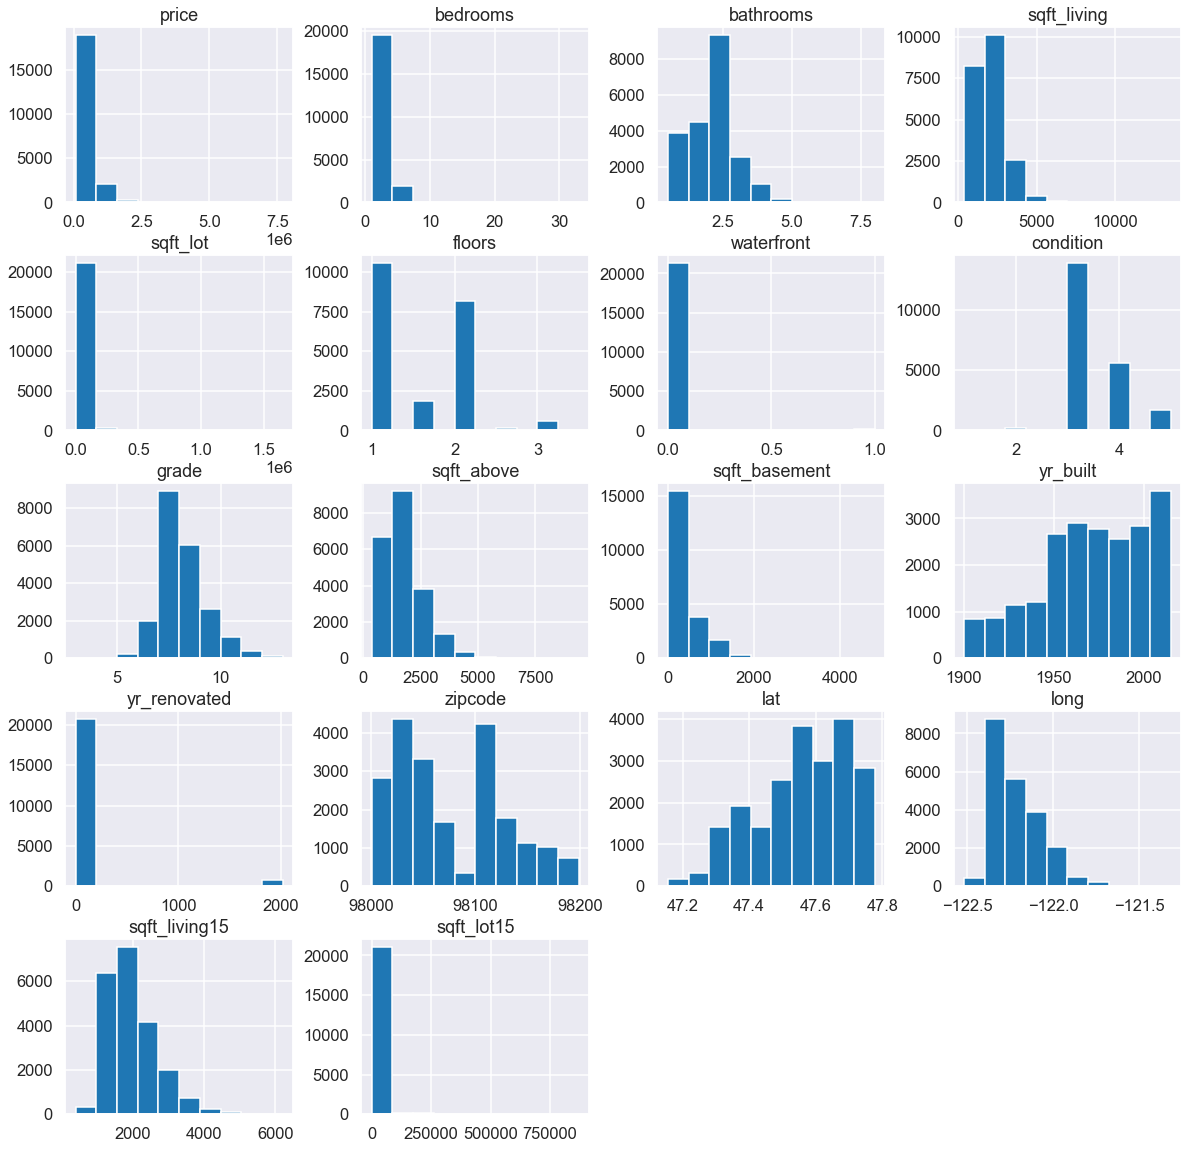

In [1656]:
#quick scan for normality and inflated '0'
kc_house.hist(figsize = (20, 20))

In [1657]:
#save
plt.savefig('./Data & Figures/all_histplot')

<Figure size 432x288 with 0 Axes>

In [1658]:
#split data into 2 groups of type continous and type categoricals and see how they behave with respect to 'price'
continuous = ['price', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
categoricals = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

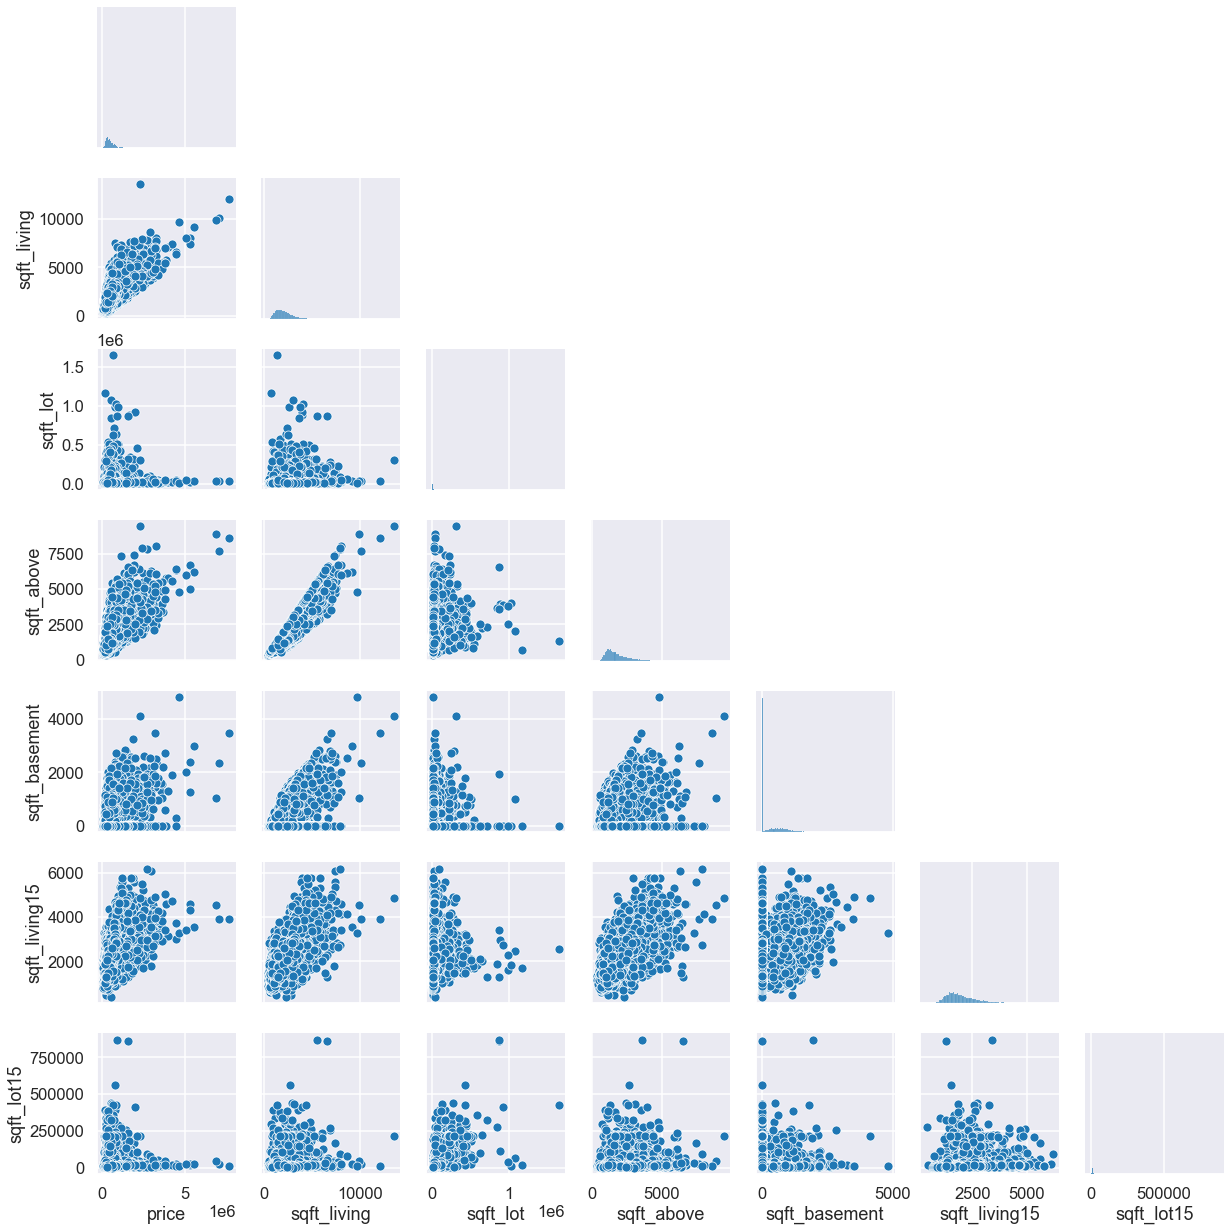

In [1659]:
#take a closer look at continuous data
sns.pairplot(kc_house[continuous], diag_kind = 'hist', corner = True)

In [1660]:
#save
plt.savefig('./Data & Figures/continuous_pairplot')

<Figure size 432x288 with 0 Axes>

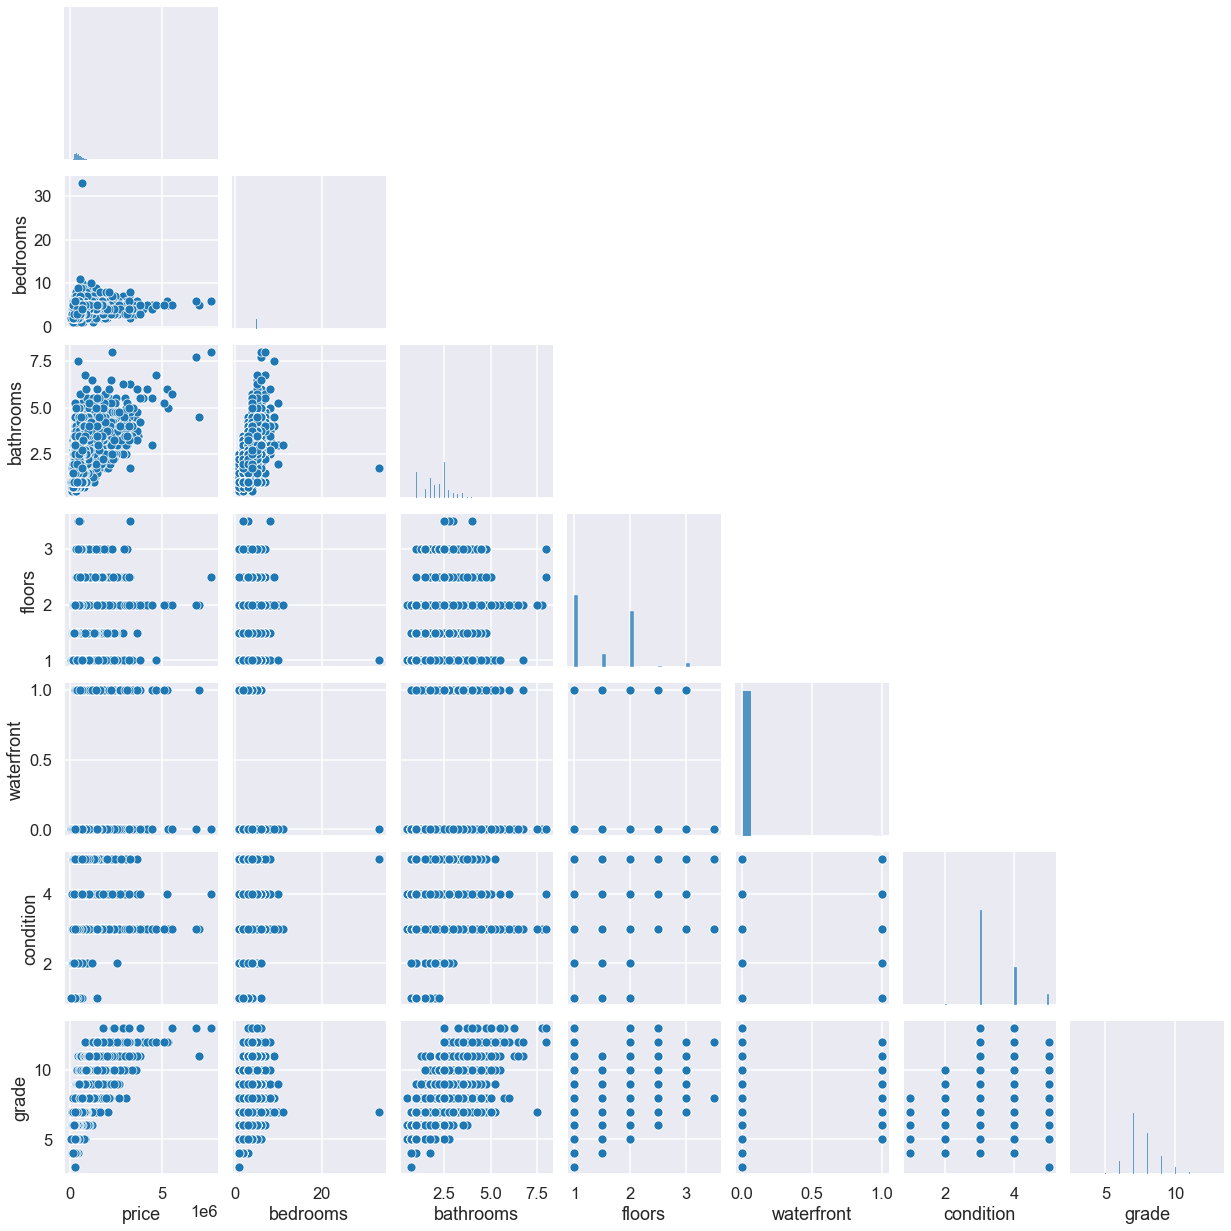

In [1661]:
#take a closer look at categoricals data
sns.pairplot(kc_house[categoricals], diag_kind = 'hist', corner = True)

In [1662]:
#save
plt.savefig('./Data & Figures/categoricals_pairplot')

<Figure size 432x288 with 0 Axes>

We see that 'bedrooms', 'bathrooms', and 'grade' have somewhat of a linearity with respect to 'price.' We will look at them again later to determine if they belong to continous data group or categorical data group.

## In-Depth Look into Each Feature

### Check for Normality and Linearity

### Price: 'price'

In [1663]:
#look at summary statistics & remove scientific notation
kc_house['price'].describe().apply(lambda x: format(x, 'f'))

count      21420.000000
mean      541272.456956
std       367719.436952
min        78000.000000
25%       323725.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

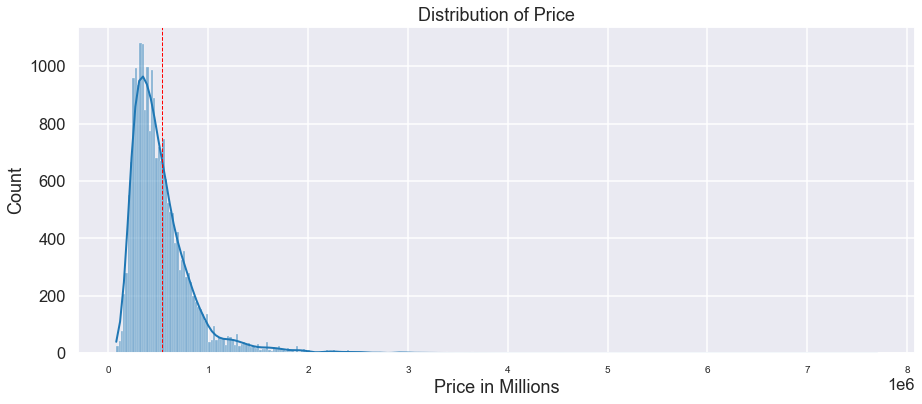

In [1664]:
#plot 'price'
plt.figure(figsize = (15, 6))
sns.histplot(kc_house['price'], kde = True)

#set labels
plt.title('Distribution of Price')
plt.xlabel('Price in Millions')

#draw mean()
plt.axvline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1665]:
#save
plt.savefig('./Data & Figures/price_distribution_histplot')

<Figure size 432x288 with 0 Axes>

'price' has a super long right tail.

### Square footage of the home: 'sqft_living'

In [1666]:
#look at summary statistics & remove scientific notation
kc_house['sqft_living'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean      2083.132633
std        918.808412
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: object

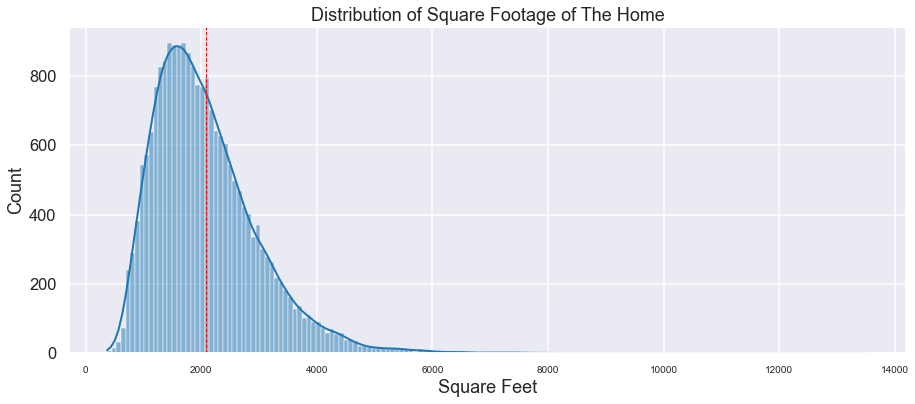

In [1667]:
#plot 'sqft_living'
plt.figure(figsize = (15, 6))
sns.histplot(kc_house['sqft_living'], kde = True)

#set labels
plt.title('Distribution of Square Footage of The Home')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_living'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1668]:
#save
plt.savefig('./Data & Figures/sqft_living_distribution_histplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

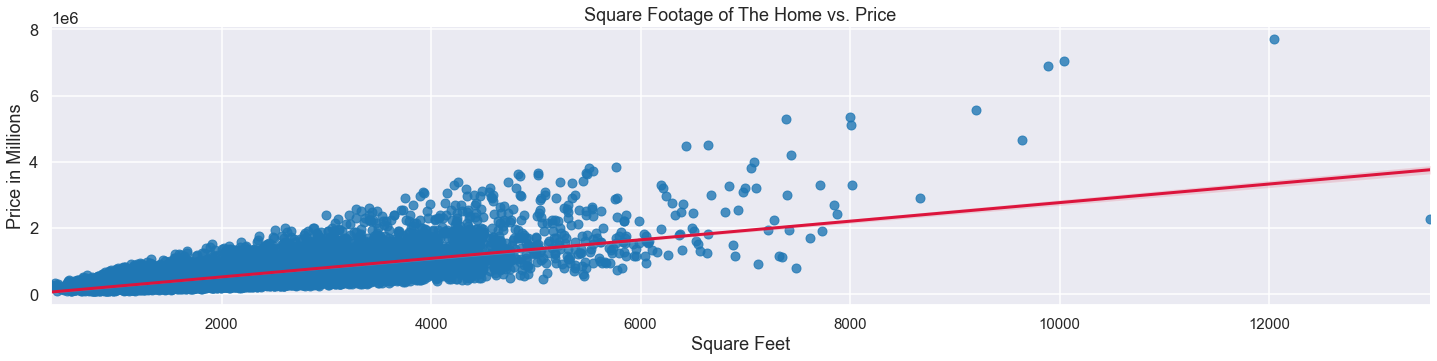

In [1669]:
#plot 'price' vs. sqft_living'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Footage of The Home vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [1670]:
#save
plt.savefig('./Data & Figures/sqft_living_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [1671]:
#get correlation
kc_house[['sqft_living', 'price']].corr()

sqft_living     price
sqft_living     1.000000  0.701651
price           0.701651  1.000000

### Square footage of the lot: 'sqft_lot'

In [1672]:
#look at summary statistics & remove scientific notation
kc_house['sqft_lot'].describe().apply(lambda x: format(x, 'f'))

count      21420.000000
mean       15128.038002
std        41530.796838
min          520.000000
25%         5040.000000
50%         7614.000000
75%        10690.500000
max      1651359.000000
Name: sqft_lot, dtype: object

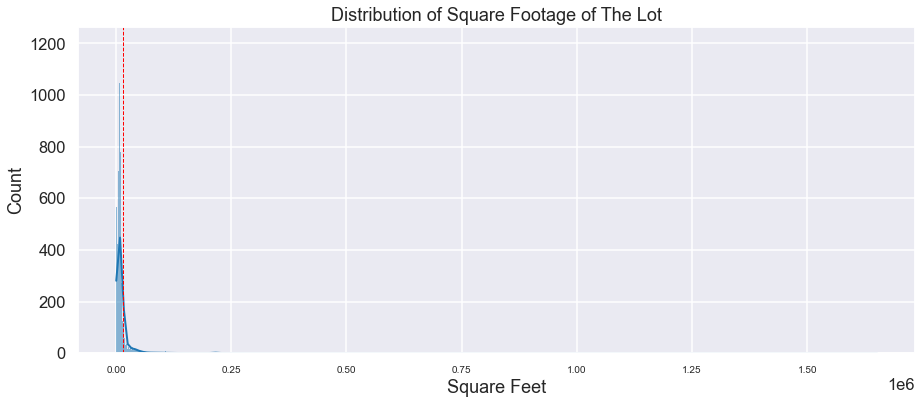

In [1673]:
#plot 'sqft_lot'
plt.figure(figsize = (15, 6))
sns.histplot(kc_house['sqft_lot'], kde = True)

#set labels
plt.title('Distribution of Square Footage of The Lot')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_lot'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1674]:
#save
plt.savefig('./Data & Figures/sqft_lot_distribution_histplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

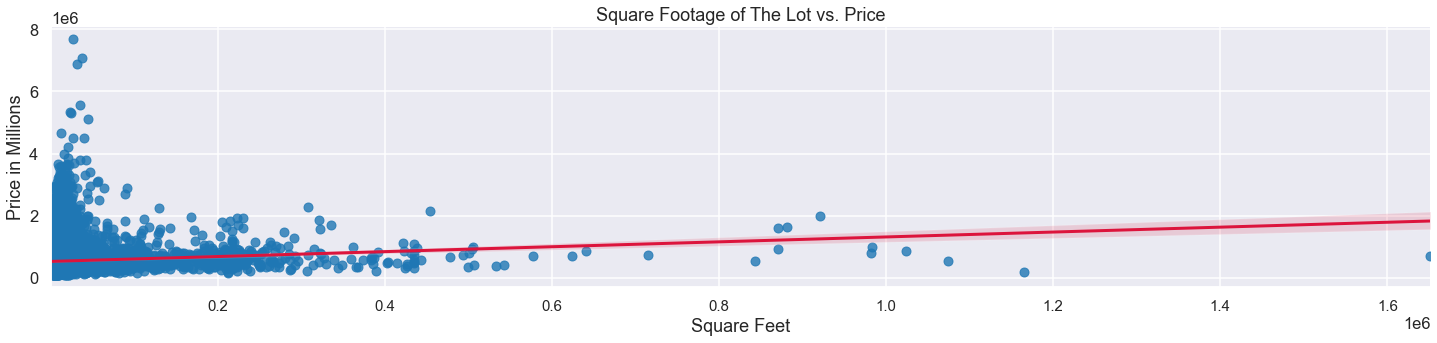

In [1675]:
#plot 'price' vs. sqft_lot'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Footage of The Lot vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [1676]:
#save
plt.savefig('./Data & Figures/sqft_lot_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [1677]:
kc_house[['sqft_lot', 'price']].corr()

sqft_lot     price
sqft_lot  1.000000  0.088936
price     0.088936  1.000000

'sqft_lot' has very low correlation with 'price' hence we will not be using this feature.

### Square footage of house apart from basement: 'sqft_above'

In [1678]:
#look at summary statistics & remove scientific notation
kc_house['sqft_above'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean      1791.170215
std        828.692965
min        370.000000
25%       1200.000000
50%       1560.000000
75%       2220.000000
max       9410.000000
Name: sqft_above, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


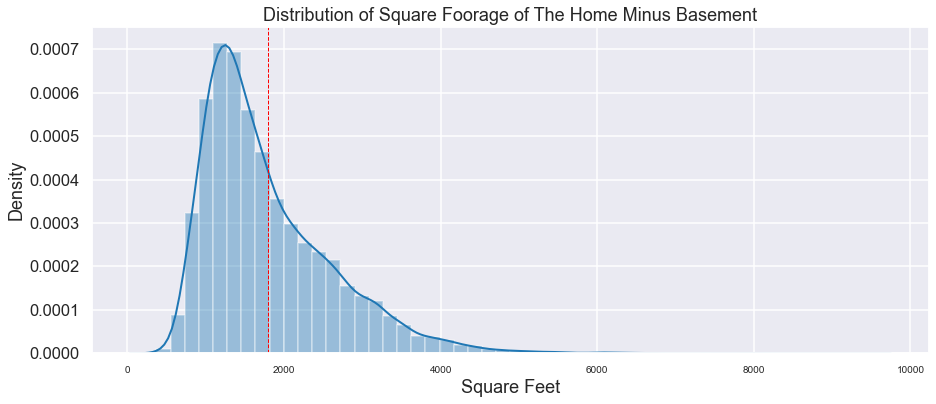

In [1679]:
#plot 'sqft_above'
plt.figure(figsize = (15, 6))
sns.distplot(kc_house['sqft_above'], kde = True)

#set labels
plt.title('Distribution of Square Foorage of The Home Minus Basement')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_above'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1680]:
#save
plt.savefig('./Data & Figures/sqft_above_distribution_histplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

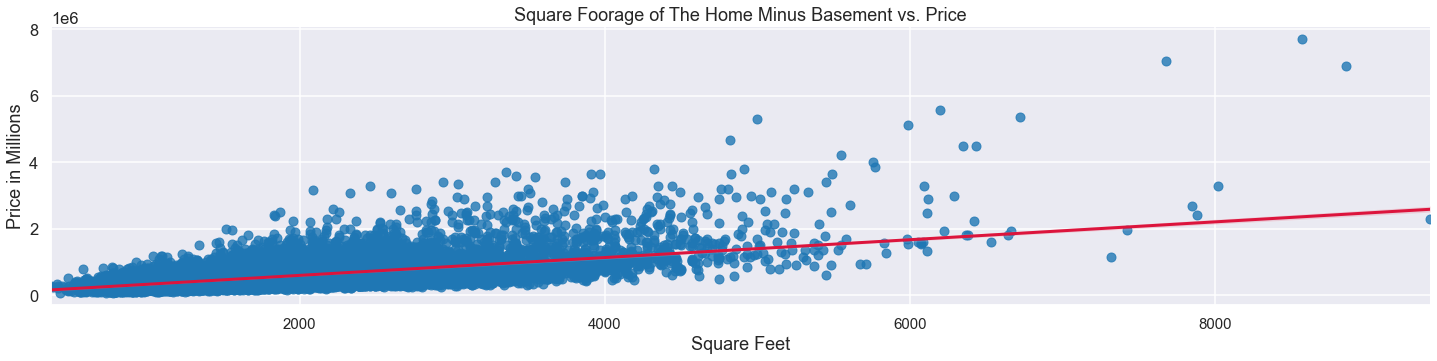

In [1681]:
#plot 'price' vs. sqft_above'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_above',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Foorage of The Home Minus Basement vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [1682]:
#save
plt.savefig('./Data & Figures/sqft_above_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [1683]:
kc_house[['sqft_above', 'price']].corr()

sqft_above     price
sqft_above    1.000000  0.604916
price         0.604916  1.000000

### Square footage of basement: 'sqft_basement'

In [1684]:
#look at summary statistics & remove scientific notation
kc_house['sqft_basement'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean       291.962418
std        442.875502
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: object

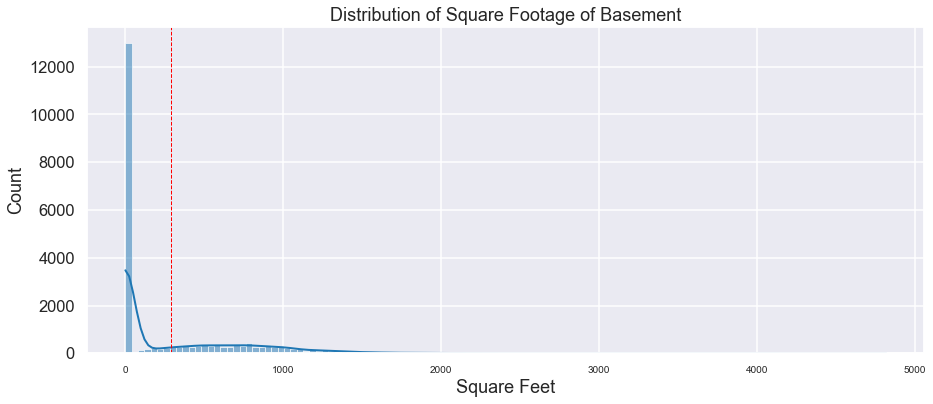

In [1685]:
#plot 'sqft_basement'
plt.figure(figsize = (15, 6))
sns.histplot(kc_house['sqft_basement'], kde = True)

#set labels
plt.title('Distribution of Square Footage of Basement')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_basement'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1686]:
#save
plt.savefig('./Data & Figures/sqft_basement_distribution_histplot')

<Figure size 432x288 with 0 Axes>

There are inflated value of 0 since many houses have no basement. Zero-inflated variable is cumbersome to work with so we will not be using this 'sqft_basement' feature.

<Figure size 1080x360 with 0 Axes>

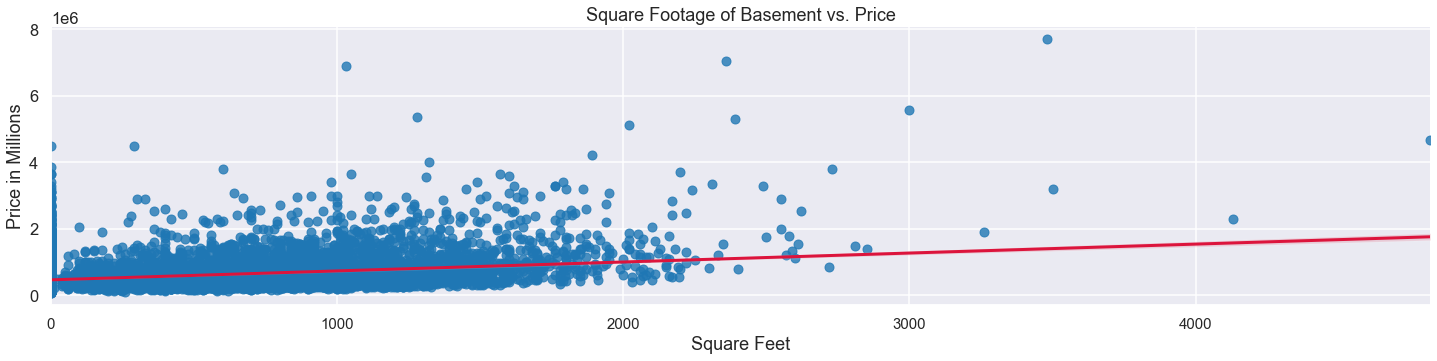

In [1687]:
#plot 'price' vs. sqft_basement'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_basement',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Footage of Basement vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [1688]:
kc_house[['sqft_basement', 'price']].corr()

sqft_basement     price
sqft_basement       1.000000  0.323777
price               0.323777  1.000000

### Square footage of interior housing living space for the nearest 15 neighbors: 'sqft_living15'

In [1689]:
#look at summary statistics & remove scientific notation
kc_house['sqft_living15'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean      1988.384080
std        685.537057
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2370.000000
max       6210.000000
Name: sqft_living15, dtype: object

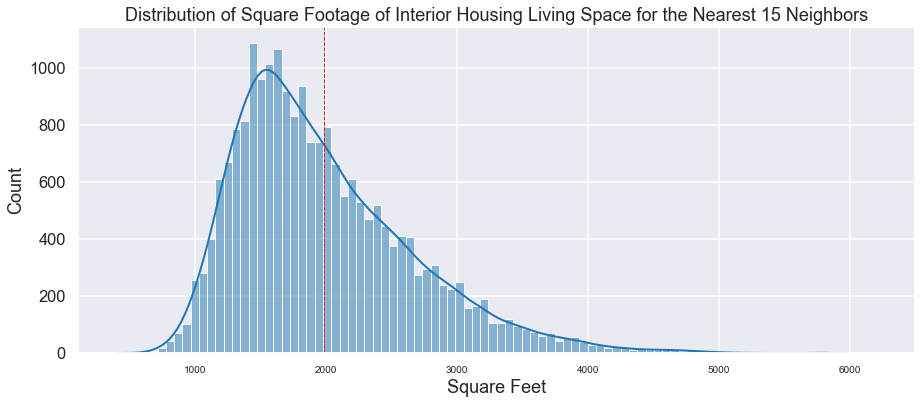

In [1690]:
#plot 'sqft_living15'
plt.figure(figsize = (15, 6))
sns.histplot(kc_house['sqft_living15'], kde = True)

#set labels
plt.title('Distribution of Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_living15'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1691]:
#save
plt.savefig('./Data & Figures/sqft_living15_distribution_histplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

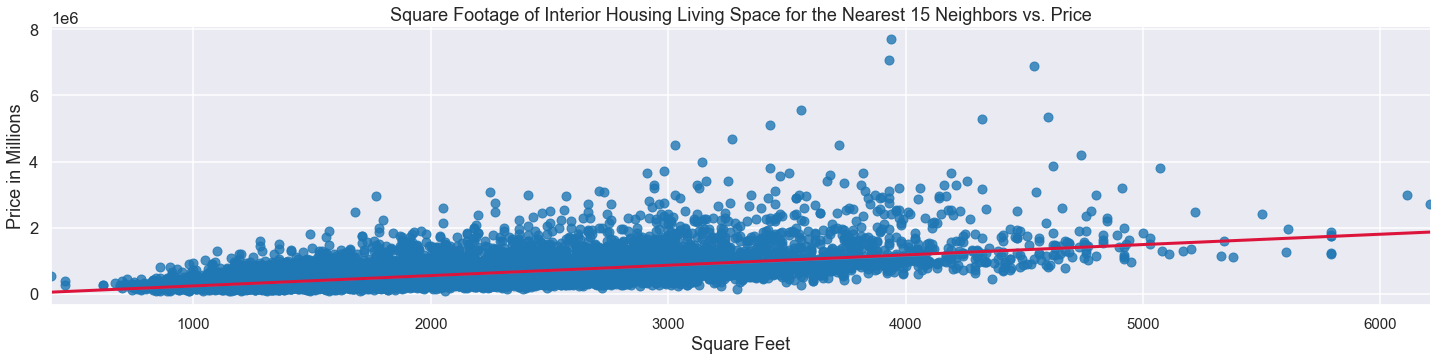

In [1692]:
#plot 'price' vs. sqft_living15'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living15',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [1693]:
#save
plt.savefig('./Data & Figures/sqft_living15_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [1694]:
kc_house[['sqft_living15', 'price']].corr()

sqft_living15     price
sqft_living15       1.000000  0.584227
price               0.584227  1.000000

### Square footage of the land lots of the nearest 15 neighbors: 'sqft_lot15'

In [1695]:
#look at summary statistics & remove scientific notation
kc_house['sqft_lot15'].describe().apply(lambda x: format(x, 'f'))

count     21420.000000
mean      12775.718161
std       27345.621867
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10086.250000
max      871200.000000
Name: sqft_lot15, dtype: object

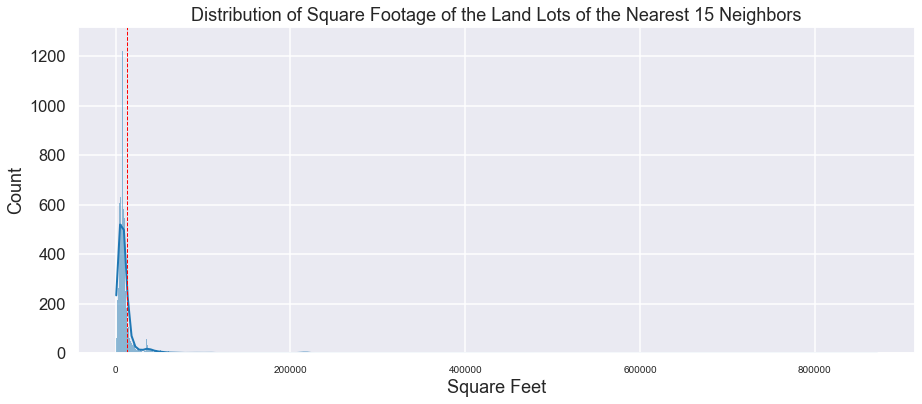

In [1696]:
#plot 'sqft_lot15'
plt.figure(figsize = (15, 6))
sns.histplot(kc_house['sqft_lot15'], kde = True)

#set labels
plt.title('Distribution of Square Footage of the Land Lots of the Nearest 15 Neighbors')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_lot15'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1697]:
#save
plt.savefig('./Data & Figures/sqft_lot15_distribution_histplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

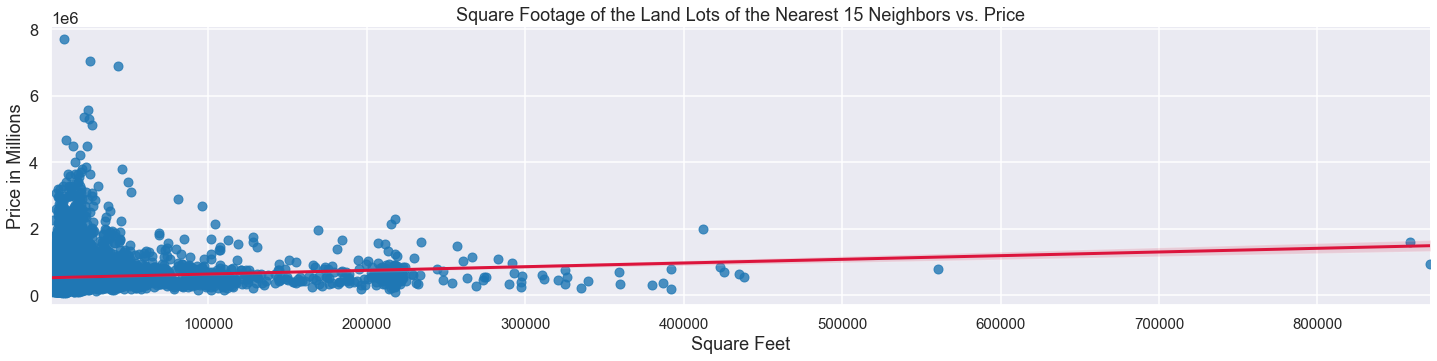

In [1698]:
#plot 'price' vs. sqft_lot15'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot15',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Footage of the Land Lots of the Nearest 15 Neighbors vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [1699]:
#save
plt.savefig('./Data & Figures/sqft_lot15_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [1700]:
kc_house[['sqft_lot15', 'price']].corr()

sqft_lot15     price
sqft_lot15    1.000000  0.082247
price         0.082247  1.000000

'sqft_lot15' has a very low correlation with 'price' hence we will not be using this feature.

### Number of Bedrooms: 'bedrooms'

In [1830]:
kc_house['bedrooms'].nunique()

12

In [1831]:
y_values = kc_house['bedrooms'].value_counts(ascending=False)
x_values = y_values.index

y_values

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


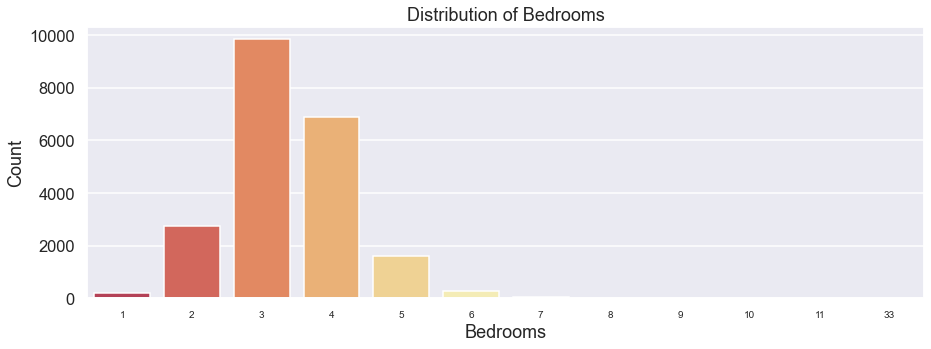

In [1832]:
#plot 'bedroom' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values,
            palette = "Spectral")

#set labels
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1833]:
#save
plt.savefig('./Data & Figures/bedrooms_distribution_barplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

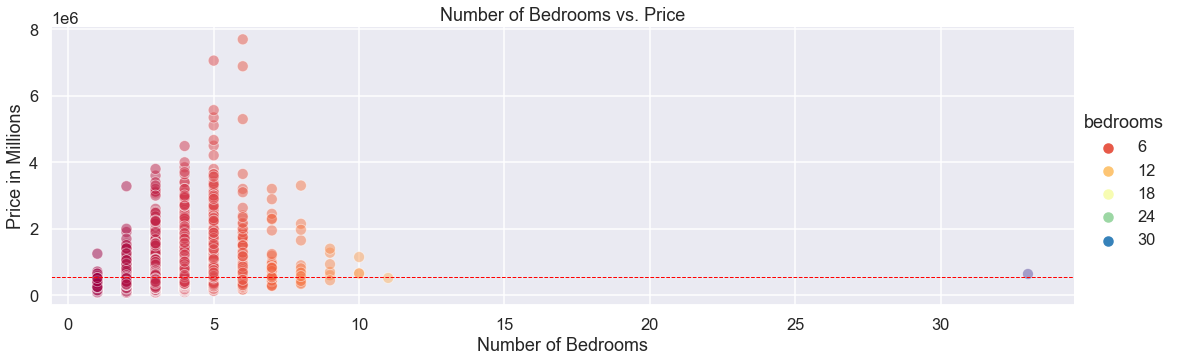

In [1834]:
#plot 'bedrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bedrooms',
            y = 'price',
            hue = 'bedrooms',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')

#show
plt.show()

In [1835]:
#save
plt.savefig('./Data & Figures/bedrooms_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

We can see there is an outlier at 30+ number of bedrooms. 

In [1836]:
#check out the outlier at 9+ number of bedrooms
kc_house[kc_house['bedrooms'] > 9]

id        date      price  bedrooms  bathrooms  sqft_living  \
8748   1773100755   8/21/2014   520000.0        11       3.00         3000   
13301   627300145   8/14/2014  1150000.0        10       5.25         4590   
15147  5566100170  10/29/2014   650000.0        10       2.00         3610   
15856  2402100895   6/25/2014   640000.0        33       1.75         1620   
19239  8812401450  12/29/2014   660000.0        10       3.00         2920   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8748       4960     2.0         0.0   0.0  ...      7        2400   
13301     10920     1.0         0.0   2.0  ...      9        2500   
15147     11914     2.0         0.0   0.0  ...      7        3010   
15856      6000     1.0         0.0   0.0  ...      7        1040   
19239      3745     2.0         0.0   0.0  ...      7        1860   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
8748           600.0     1918        1999.0    98106  47.5560 -122.363   
13301         2090.0     2008           0.0    98004  47.5861 -122.113   
15147          600.0     1958           0.0    98006  47.5705 -122.175   
15856          580.0     1947           0.0    98103  47.6878 -122.331   
19239         1060.0     1913           0.0    98105  47.6635 -122.320   

       sqft_living15  sqft_lot15  
8748            1420        4960  
13301           2730       10400  
15147           2040       11914  
15856           1330        4700  
19239           1810        3745  

[5 rows x 21 columns]

We see that the house with 33 bedrooms only has 1.75 bathrooms, which makes little sense. There are also houses with 10-11 bedrooms with only 2-3 bathrroms, which also makes little sense. We can assume that there is a typo in '33' or in '1.75': 3 bedrooms with 1.75 bathrooms, 13 bedrooms with 1.75 bathrooms or 33 bedrooms with 17.5 bathrooms, etc. Since this is the outlier that impacts our data spread, we will replace with the median value of 'bedrooms'.

In [1852]:
#replace 33-bedrooms data with median value
kc_house.loc[kc_house['bedrooms'] == 33, 'bedrooms'] = kc_house['bedrooms'].median()

#check again to see if it is gone
kc_house.loc[kc_house['bedrooms'] == 33]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [1854]:
kc_house['bedrooms'].describe()

count    21591.000000
mean         3.371868
std          0.904143
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [1850]:
#treats any value that’s more than 3 standard deviations away from the mean as an outlier, 
#and drops all the rows containing outliers

# calculate summary statistics
bedrooms_mean, bedrooms_std = np.mean(kc_house['bedrooms']), np.std(kc_house['bedrooms'])

# identify outliers
bedrooms_cut_off = bedrooms_std * 3
bedrooms_lower, bedrooms_upper = bedrooms_mean - bedrooms_cut_off, bedrooms_mean + bedrooms_cut_off
bedrooms_outliers = [x for x in kc_house['bedrooms'] if x < bedrooms_lower or x > bedrooms_upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
bedrooms_outliers_removed = [x for x in kc_house['bedrooms'] if x > bedrooms_lower and x < bedrooms_upper]
print('Non-outlier observations: %d' % len(bedrooms_outliers_removed))

#drop outliers from datafram
kc_house.drop(bedrooms_outliers_removed, inplace = True)

Identified outliers: 186
Non-outlier observations: 21535


<Figure size 1080x1080 with 0 Axes>

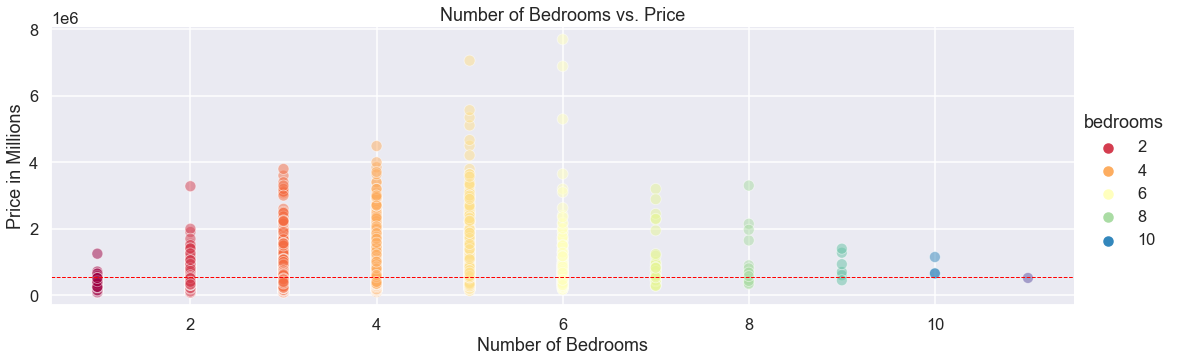

In [1853]:
#plot 'bedrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bedrooms',
            y = 'price',
            hue = 'bedrooms',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')

#show
plt.show()

In [1710]:
#save
plt.savefig('./Data & Figures/bedrooms_<10_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

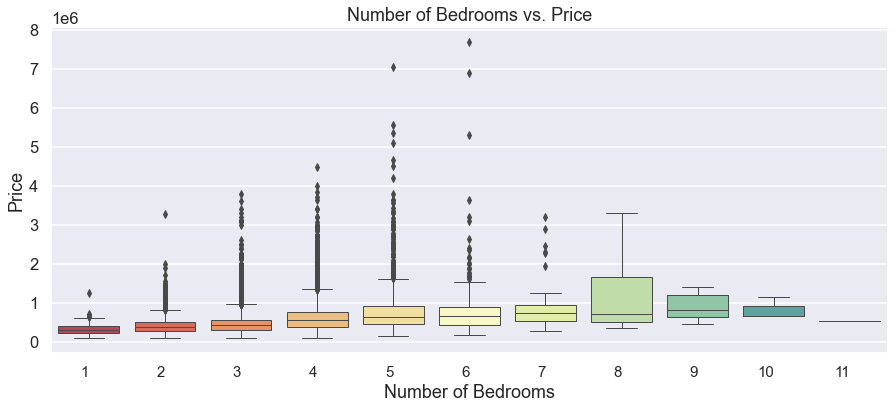

In [1840]:
#plot 'bedrooms' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['bedrooms'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [1841]:
#save
plt.savefig('./Data & Figures/bedrooms_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

In [1842]:
kc_house[['bedrooms', 'price']].corr()

bedrooms     price
bedrooms  1.000000  0.315867
price     0.315867  1.000000

### Number of Bathrooms: 'bathrooms'

In [1843]:
kc_house['bathrooms'].nunique()

29

In [1844]:
y_values = kc_house['bathrooms'].value_counts(ascending=False)
x_values = y_values.index

y_values

2.50    5377
1.00    3850
1.75    3048
2.25    2045
2.00    1929
1.50    1445
2.75    1185
3.00     752
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


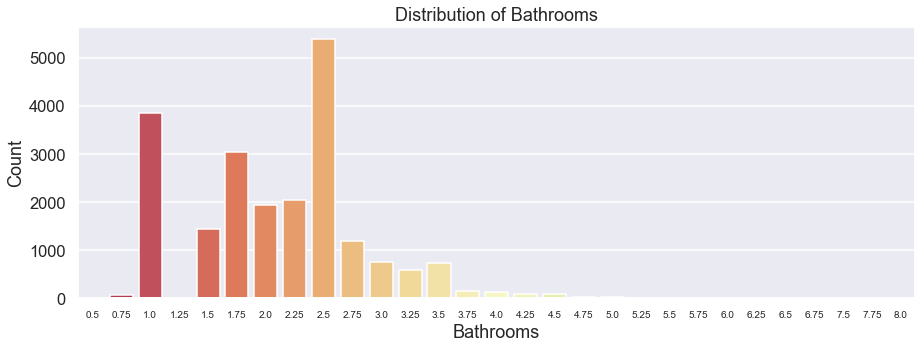

In [1845]:
#plot 'bathrooms' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1846]:
#save
plt.savefig('./Data & Figures/bathrooms_distribution_barplot')

<Figure size 432x288 with 0 Axes>

In [1855]:
kc_house['bathrooms'].dtypes

dtype('float64')

In [1857]:
#treats any value that’s more than 3 standard deviations away from the mean as an outlier, 
#and drops all the rows containing outliers

#calculate summary statistics
bathrooms_mean, bathrooms_std = np.mean(kc_house['bathrooms']), np.std(kc_house['bathrooms'])

#identify outliers
bathrooms_cut_off = bathrooms_std * 3
bathrooms_lower, bathrooms_upper = bathrooms_mean - bathrooms_cut_off, bathrooms_mean + bathrooms_cut_off
bathrooms_outliers = [x for x in kc_house['bathrooms'] if x < bathrooms_lower or x > bathrooms_upper]
print('Identified outliers: %d' % len(bathrooms_outliers))

#outliers
bathrooms_outliers_removed = [x for x in kc_house['bathrooms'] if x > bathrooms_lower and x < bathrooms_upper]
print('Non-outlier observations: %d' % len(bathrooms_outliers_removed))

Identified outliers: 186
Non-outlier observations: 21405


In [1859]:
#remove outliers from dataframe
count = 0
bath_outliers = []
mean = np.mean(kc_house['bathrooms'])
max_distance = np.std(kc_house['bathrooms']) * 3 

for idx, row in kc_house['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        kc_house.drop(idx, inplace=True)
        
count

186

<Figure size 1080x1080 with 0 Axes>

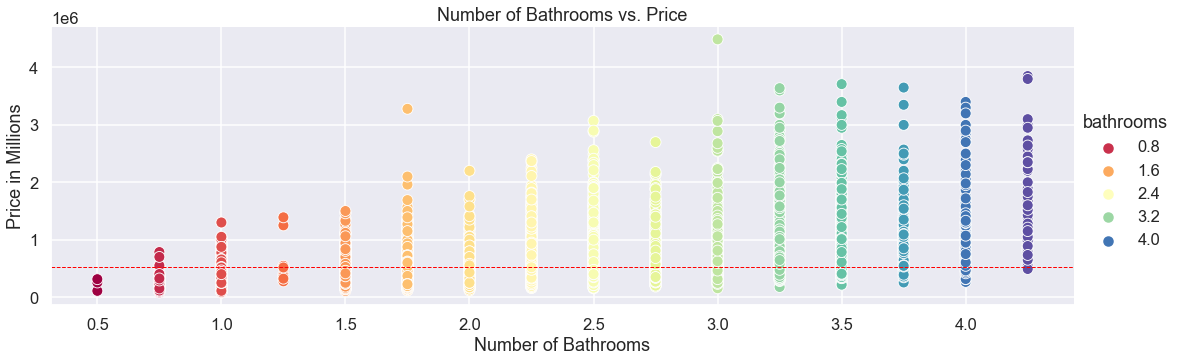

In [1860]:
#plot 'bathrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bathrooms',
            y = 'price',
            hue = 'bathrooms',
            data = kc_house,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price in Millions')

#show
plt.show()

In [1720]:
#save
plt.savefig('./Data & Figures/bathrooms_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

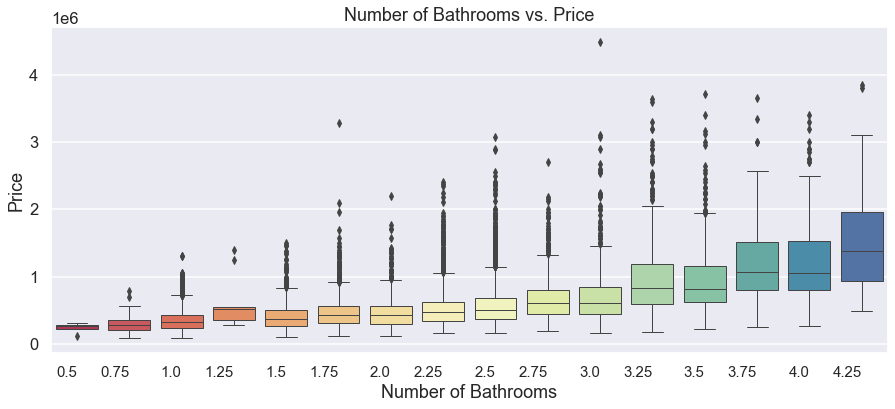

In [1862]:
#plot 'bathrooms' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['bathrooms'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [1723]:
#save
plt.savefig('./Data & Figures/bathrooms_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

In [1863]:
kc_house[['bathrooms', 'price']].corr()

bathrooms     price
bathrooms   1.000000  0.489627
price       0.489627  1.000000

### Number of Floors: 'floors'

In [1725]:
kc_house['floors'].nunique()

6

In [1726]:
y_values = kc_house['floors'].value_counts(ascending=False)
x_values = y_values.index

y_values

1.0    10552
2.0     8203
1.5     1888
3.0      609
2.5      161
3.5        7
Name: floors, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


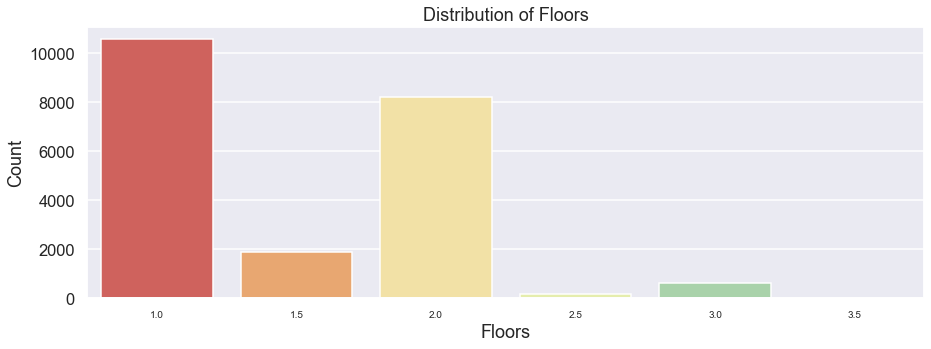

In [1727]:
#plot 'floors' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1728]:
#save
plt.savefig('./Data & Figures/floors_distribution_barplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

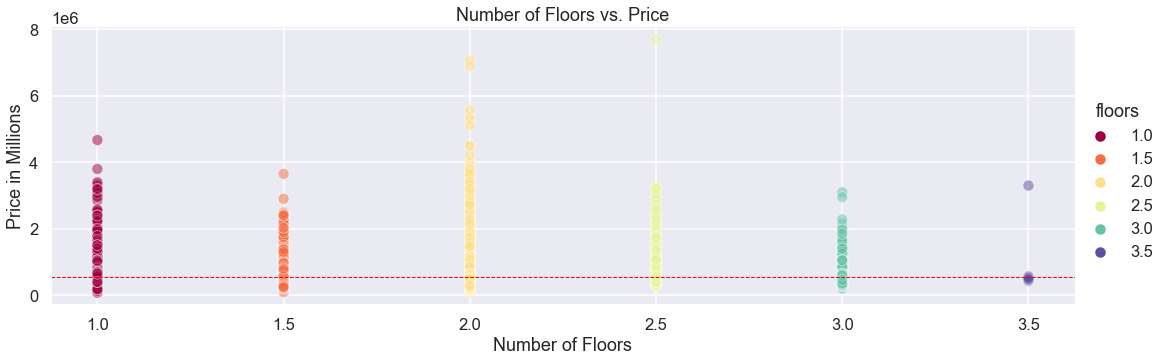

In [1729]:
#plot 'floors' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'floors',
            y = 'price',
            hue = 'floors',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price in Millions')

#show
plt.show()

In [1730]:
#save
plt.savefig('./Data & Figures/floors_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

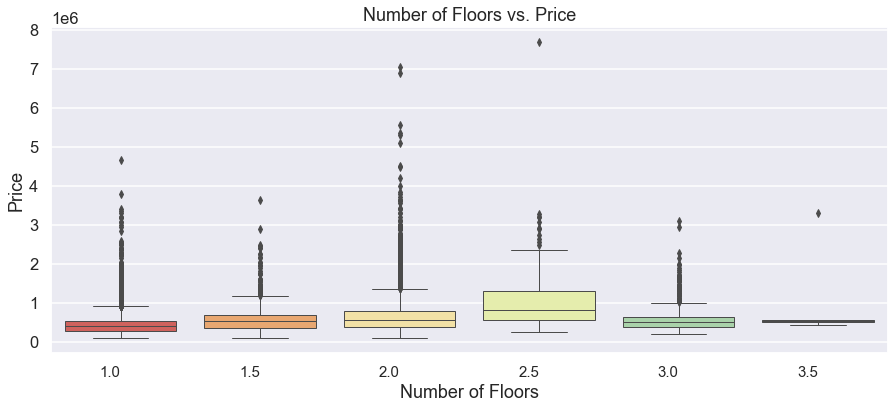

In [1731]:
#plot 'floors' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['floors'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [1732]:
#save
plt.savefig('./Data & Figures/floors_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

In [1733]:
kc_house[['floors', 'price']].corr()

floors     price
floors  1.000000  0.255711
price   0.255711  1.000000

### Waterfront: 'waterfront'

In [1734]:
kc_house['waterfront'].nunique()

2

In [1735]:
y_values = kc_house['waterfront'].value_counts(ascending=False)
x_values = y_values.index

y_values

0.0    21274
1.0      146
Name: waterfront, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


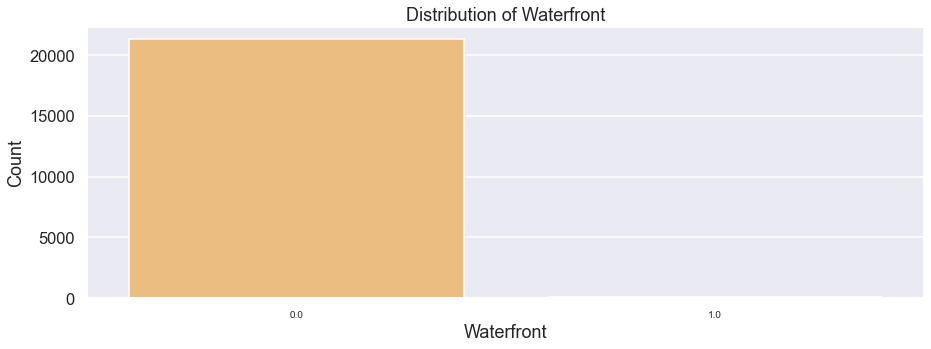

In [1736]:
#plot 'waterfront' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1737]:
#save
plt.savefig('./Data & Figures/waterfront_distribution_barplot')

<Figure size 432x288 with 0 Axes>

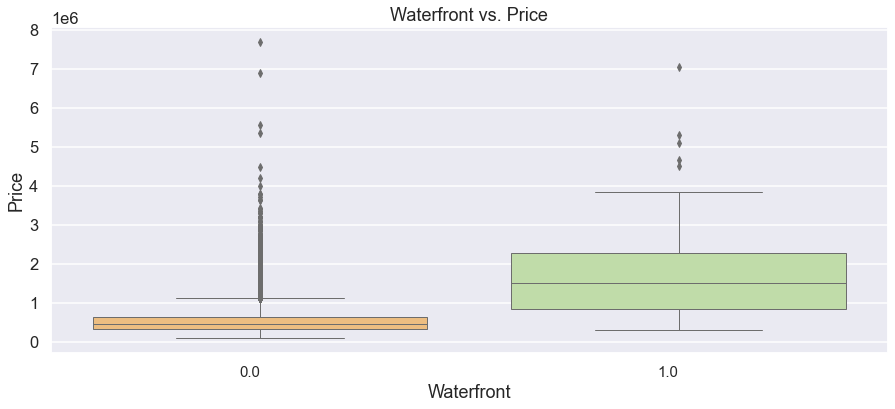

In [1738]:
#plot 'waterfront' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['waterfront'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Waterfront vs. Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [1739]:
#save
plt.savefig('./Data & Figures/waterfront_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

In [1740]:
kc_house[['waterfront', 'price']].corr()

waterfront    price
waterfront     1.00000  0.26493
price          0.26493  1.00000

### Condition: 'condition'

Relative to age and grade. Coded 1-5.

1 = Poor - Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair - Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average - Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good - No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5 = Very Good - All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [1741]:
kc_house['condition'].nunique()

5

In [1742]:
y_values = kc_house['condition'].value_counts(ascending = False)
x_values = y_values.index

y_values

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


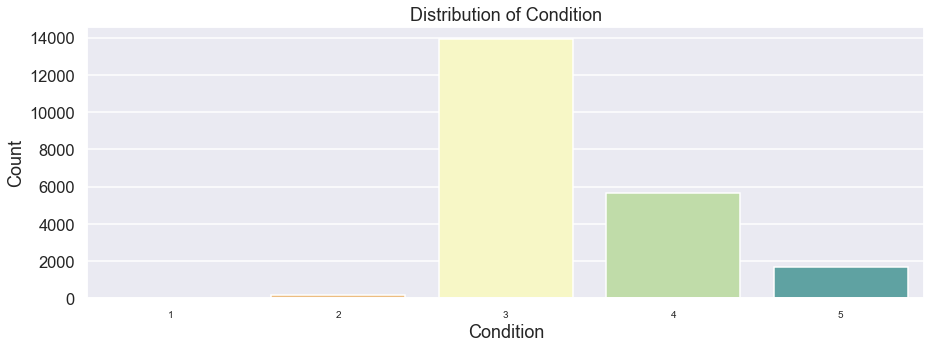

In [1743]:
#plot 'condition' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1744]:
#save
plt.savefig('./Data & Figures/condition_distribution_barplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

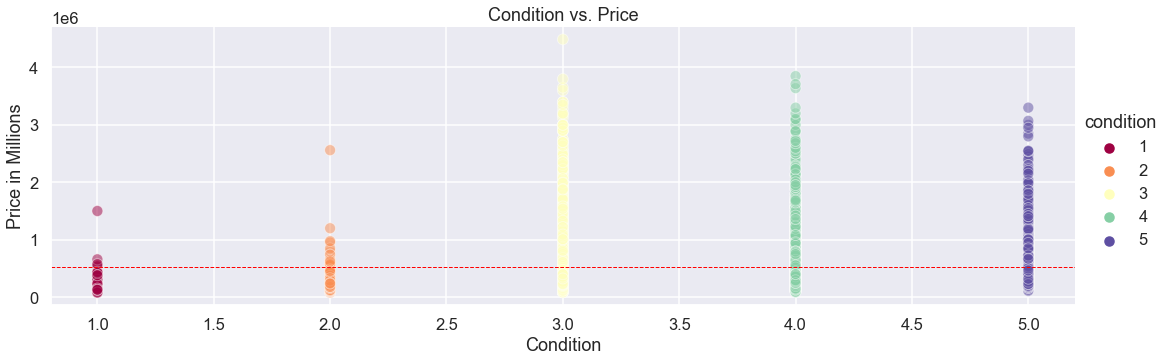

In [1865]:
#plot 'condition' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'condition',
            y = 'price',
            hue = 'condition',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price in Millions')

#show
plt.show()

In [1746]:
#save
plt.savefig('./Data & Figures/condition_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

We see that majority of the houses are in condition 3 (average) and they surprisingly perform better than those with condition 4 (good) and condition 5 (very good). This could be an interesting feature to include in our model since there are obviously other interactions in play.

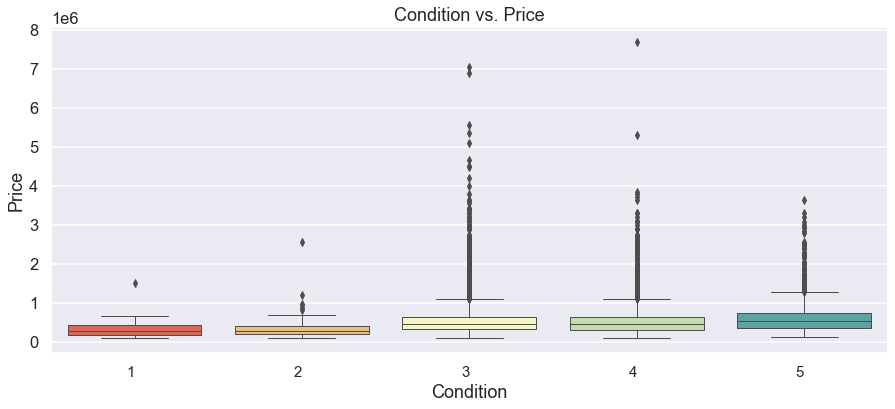

In [1747]:
#plot 'condition' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['condition'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [1748]:
#save
plt.savefig('./Data & Figures/condition_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

In [1749]:
kc_house[['condition', 'price']].corr()

condition    price
condition    1.00000  0.03456
price        0.03456  1.00000

### Grade: overall grade given to the housing unit, based on King County grading system: 'grade'

From grade 1 to 13:

1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

4 = Generally older, low quality construction. Does not meet code.

5 = Low construction costs and workmanship. Small, simple design.

6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 = Better architectural design with extra interior and exterior design and quality.

10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [1750]:
kc_house['grade'].nunique()

11

In [1751]:
y_values = kc_house['grade'].value_counts(ascending = False)
x_values = y_values.index

y_values

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


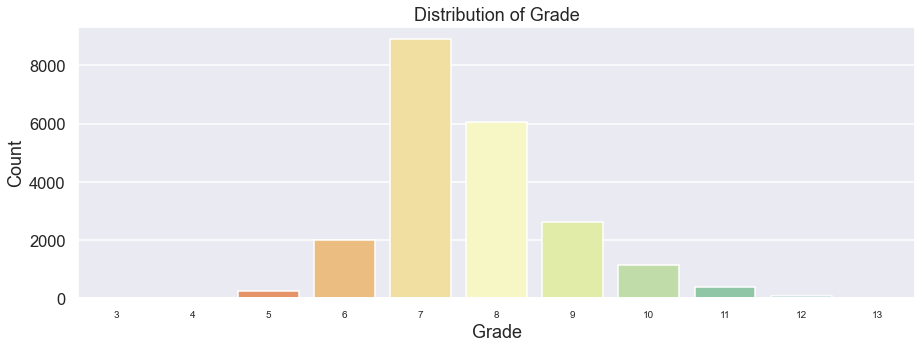

In [1752]:
#plot 'grade' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1753]:
#save
plt.savefig('./Data & Figures/grade_distribution_barplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

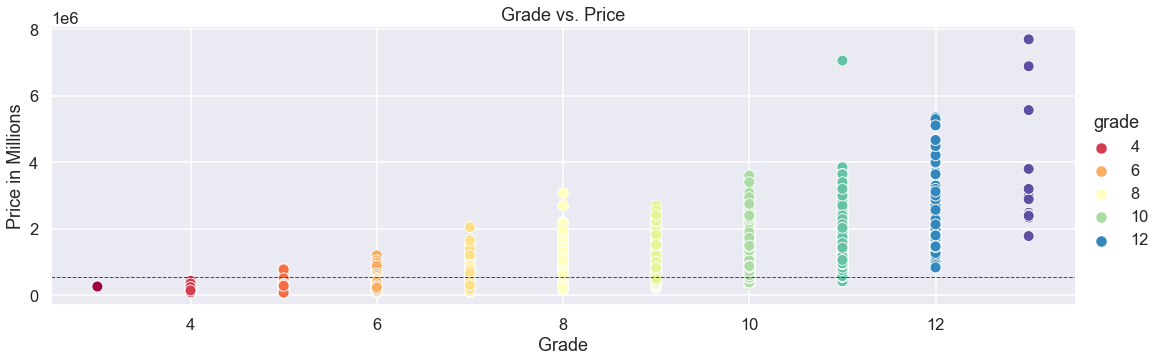

In [1754]:
#plot 'grade' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'grade',
            y = 'price',
            hue = 'grade',
            data = kc_house,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price in Millions')

#show
plt.show()

In [1755]:
#save
plt.savefig('./Data & Figures/grade_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

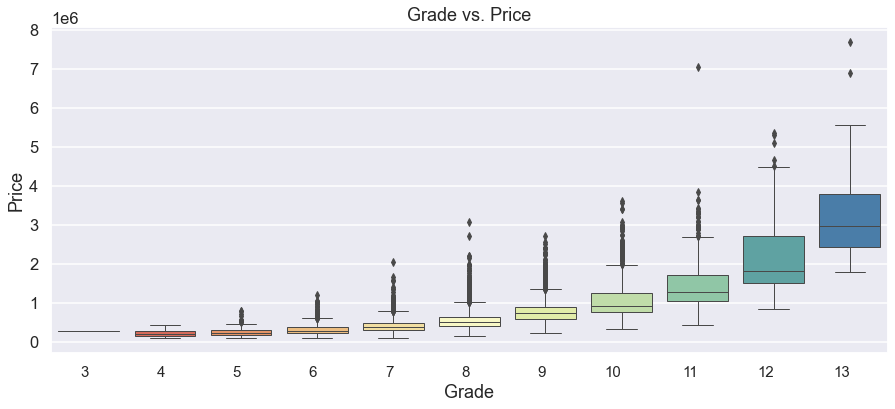

In [1756]:
#plot 'grade' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['grade'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [1757]:
#save
plt.savefig('./Data & Figures/grade_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

In [1758]:
#get correlation
kc_house[['grade', 'price']].corr()

grade     price
grade  1.000000  0.667393
price  0.667393  1.000000

We observe that 'grade' has a linear correlation with price. Although it is a categorical data, we will not use OHE on it. 

## Time Data: ‘date’, ‘yr_built’, ‘yr_renovated’

### ‘date’, 'yr_built'

In [1759]:
#get summary statistics
kc_house['date'].describe()

<ipython-input-1759-aa0088fc91f1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  kc_house['date'].describe()


count                   21420
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [1760]:
#we see from above that the dataset most current year is 2015
#use 2015 to calculate the house age
kc_house['age'] = 2015 - kc_house['yr_built']
kc_house.head()

date     price bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15937 2014-10-30  268950.0      3.0       1.00         1320      8100     1.0   
20963 2014-07-03  399900.0      2.0       1.75         1410      1005     1.5   
7614  2014-06-24  339000.0      3.0       1.00         1100      4128     1.0   
3257  2015-03-11  380000.0      2.0       1.00         1040      7372     1.0   
16723 2014-07-25  365000.0      5.0       2.00         1600      4168     1.5   

       waterfront  condition  grade  sqft_above  sqft_basement  yr_built  \
15937         0.0          3      6         880          440.0      1943   
20963         0.0          3      9         900          510.0      2011   
7614          0.0          4      7         720          380.0      1942   
3257          0.0          5      7         840          200.0      1939   
16723         0.0          3      7        1600            0.0      1927   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  age  
15937           0.0    98166  47.4697 -122.351           1000        8100   72  
20963           0.0    98027  47.5446 -122.018           1440        1188    4  
7614            0.0    98126  47.5296 -122.379           1510        4538   73  
3257            0.0    98126  47.5285 -122.378           1930        5150   76  
16723           0.0    98126  47.5297 -122.381           1190        4168   88

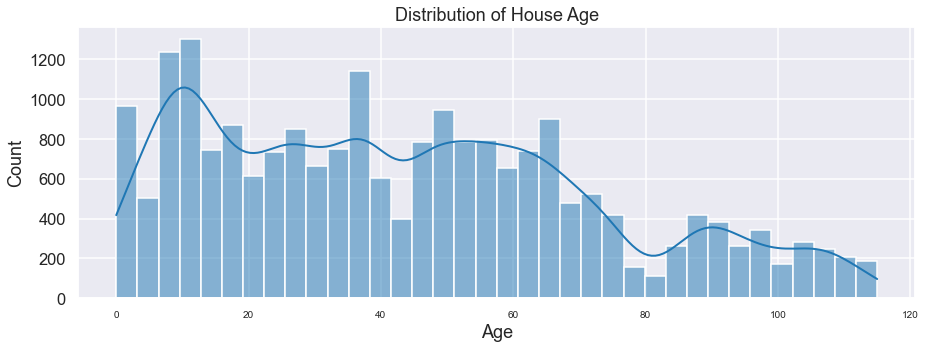

In [1761]:
#plot 'age' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['age'], kde = True)

#set labels
plt.title('Distribution of House Age')
plt.xlabel('Age')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1762]:
#save
plt.savefig('./Data & Figures/age_distribution_histplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

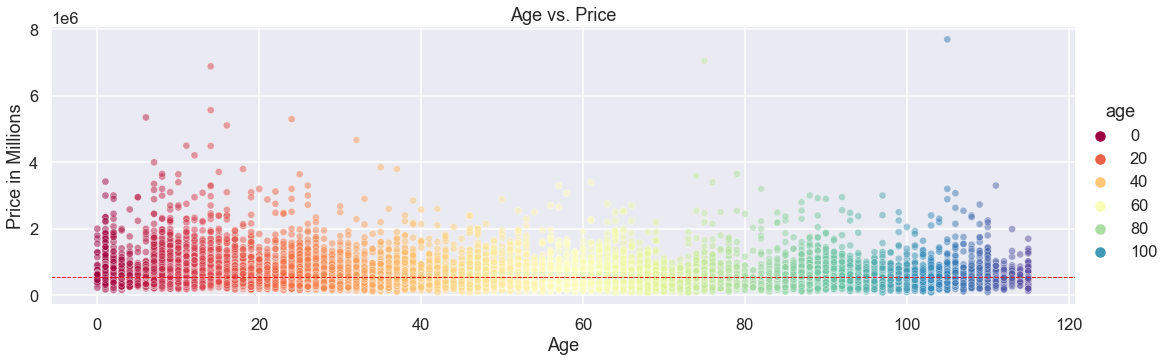

In [1763]:
#plot 'age' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'age',
            y = 'price',
            hue = 'age',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'Mean Price')

#set labels
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price in Millions')

#show
plt.show()

In [1764]:
#save
plt.savefig('./Data & Figures/age_relplot')

<Figure size 432x288 with 0 Axes>

In [1765]:
#get correlation
kc_house[['age', 'price']].corr()

age    price
age    1.00000 -0.05194
price -0.05194  1.00000

There is very little correlation between 'age' and 'price'. 

### 'yr_renovated'

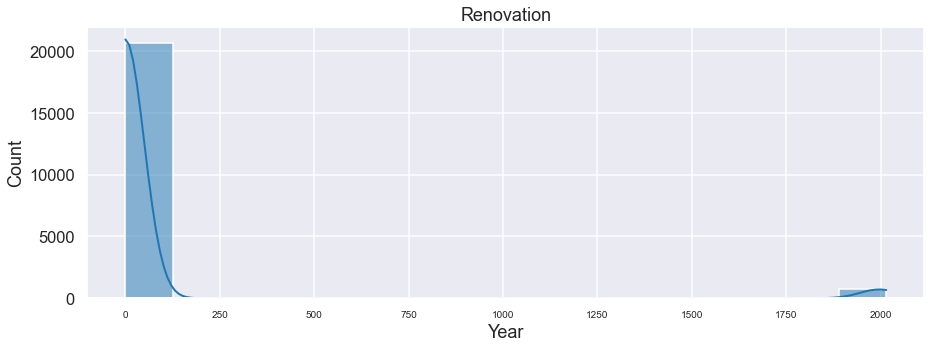

In [1766]:
#plot 'yr_renovated' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['yr_renovated'], kde = True)

#set labels
plt.title('Renovation')
plt.xlabel('Year')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [1767]:
#save
plt.savefig('./Data & Figures/yr_renovated_distribution_histplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

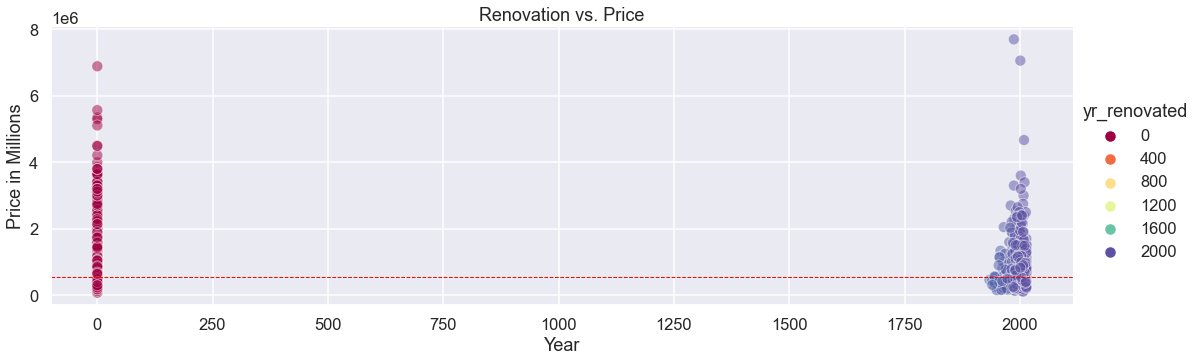

In [1768]:
#plot 'yr_renovated' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'yr_renovated',
            y = 'price',
            hue = 'yr_renovated',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Renovation vs. Price')
plt.xlabel('Year')
plt.ylabel('Price in Millions')

#show
plt.show()

In [1769]:
#save
plt.savefig('./Data & Figures/yr_renovated_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

In [1770]:
#get correlation
kc_house[['yr_renovated', 'price']].corr()

yr_renovated     price
yr_renovated      1.000000  0.118336
price             0.118336  1.000000

We see that 'yr_renovated' is zero-inflated and there is little correlation between 'yr_renovated' and 'price'. We see that it is better to represent 'yr_renovated' as categorical data: yes or no renovation with OHE later.

## Location Data: 'zipcode'

<Figure size 1080x1080 with 0 Axes>

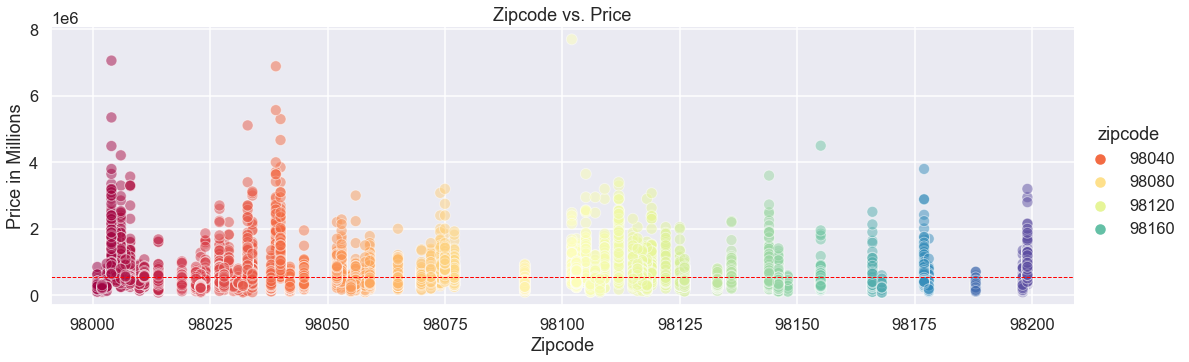

In [1771]:
#plot 'zipcode' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'zipcode',
            y = 'price',
            hue = 'zipcode',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Zipcode vs. Price')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')

#show
plt.show()

In [1772]:
#save
plt.savefig('./Data & Figures/zipcode_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

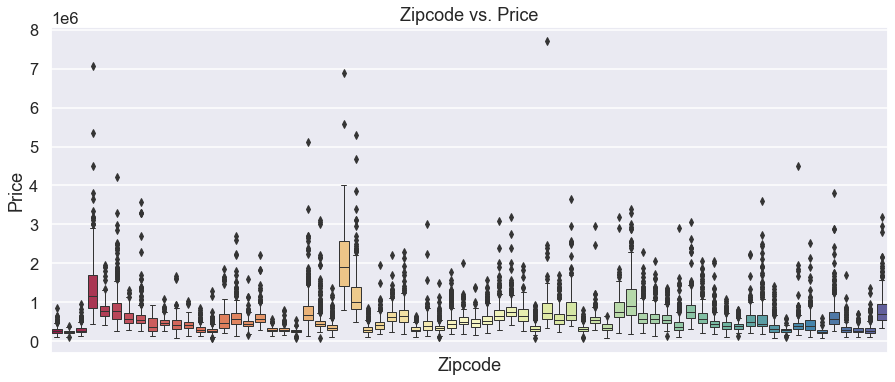

In [1773]:
#plot 'zipcode' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['zipcode'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Zipcode vs. Price')
plt.xlabel('Zipcode')
plt.ylabel('Price')

#set xticks
plt.xticks([])

#show
plt.show()

In [1774]:
#save
plt.savefig('./Data & Figures/zipcode_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

In [1775]:
kc_house[['zipcode', 'price']].corr()

zipcode     price
zipcode  1.000000 -0.051808
price   -0.051808  1.000000

## Check for Multicollinearity

In [1776]:
kc_house.corr()

price  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000   0.525859     0.701651  0.088936  0.255711   
bathrooms      0.525859   1.000000     0.755522  0.087779  0.501803   
sqft_living    0.701651   0.755522     1.000000  0.172586  0.352868   
sqft_lot       0.088936   0.087779     0.172586  1.000000 -0.005561   
floors         0.255711   0.501803     0.352868 -0.005561  1.000000   
waterfront     0.264930   0.063635     0.104737  0.021429  0.020578   
condition      0.034560  -0.129362    -0.061677 -0.009169 -0.266859   
grade          0.667393   0.665587     0.762477  0.113656  0.458091   
sqft_above     0.604916   0.686328     0.876533  0.183210  0.522751   
sqft_basement  0.323777   0.283205     0.434505  0.015239 -0.246078   
yr_built       0.051940   0.506252     0.316646  0.052312  0.488935   
yr_renovated   0.118336   0.047686     0.050851  0.004991  0.003141   
zipcode       -0.051808  -0.203884    -0.198995 -0.129422 -0.058532   
lat            0.306024   0.023143     0.050739 -0.085822  0.048900   
long           0.020368   0.223808     0.240212  0.230265  0.124812   
sqft_living15  0.584227   0.569453     0.756186  0.143805  0.279071   
sqft_lot15     0.082247   0.087760     0.183837  0.717743 -0.011367   
age           -0.051940  -0.506252    -0.316646 -0.052312 -0.488935   

               waterfront  condition     grade  sqft_above  sqft_basement  \
price            0.264930   0.034560  0.667393    0.604916       0.323777   
bathrooms        0.063635  -0.129362  0.665587    0.686328       0.283205   
sqft_living      0.104737  -0.061677  0.762477    0.876533       0.434505   
sqft_lot         0.021429  -0.009169  0.113656    0.183210       0.015239   
floors           0.020578  -0.266859  0.458091    0.522751      -0.246078   
waterfront       1.000000   0.016608  0.082905    0.071737       0.083060   
condition        0.016608   1.000000 -0.150508   -0.161483       0.174204   
grade            0.082905  -0.150508  1.000000    0.756221       0.166854   
sqft_above       0.071737  -0.161483  0.756221    1.000000      -0.052672   
sqft_basement    0.083060   0.174204  0.166854   -0.052672       1.000000   
yr_built        -0.024842  -0.365129  0.446235    0.422977      -0.134532   
yr_renovated     0.074096  -0.056264  0.015744    0.020078       0.067930   
zipcode          0.029183   0.004372 -0.183588   -0.260803       0.075163   
lat             -0.012267  -0.015566  0.112815   -0.002040       0.109081   
long            -0.037883  -0.107154  0.198555    0.344161      -0.145628   
sqft_living15    0.083921  -0.095256  0.713178    0.731887       0.199334   
sqft_lot15       0.030653  -0.003450  0.120056    0.194445       0.017558   
age              0.024842   0.365129 -0.446235   -0.422977       0.134532   

               yr_built  yr_renovated   zipcode       lat      long  \
price          0.051940      0.118336 -0.051808  0.306024  0.020368   
bathrooms      0.506252      0.047686 -0.203884  0.023143  0.223808   
sqft_living    0.316646      0.050851 -0.198995  0.050739  0.240212   
sqft_lot       0.052312      0.004991 -0.129422 -0.085822  0.230265   
floors         0.488935      0.003141 -0.058532  0.048900  0.124812   
waterfront    -0.024842      0.074096  0.029183 -0.012267 -0.037883   
condition     -0.365129     -0.056264  0.004372 -0.015566 -0.107154   
grade          0.446235      0.015744 -0.183588  0.112815  0.198555   
sqft_above     0.422977      0.020078 -0.260803 -0.002040  0.344161   
sqft_basement -0.134532      0.067930  0.075163  0.109081 -0.145628   
yr_built       1.000000     -0.203147 -0.346162 -0.148857  0.409173   
yr_renovated  -0.203147      1.000000  0.062291  0.027776 -0.064848   
zipcode       -0.346162      0.062291  1.000000  0.266712 -0.564778   
lat           -0.148857      0.027776  0.266712  1.000000 -0.136228   
long           0.409173     -0.064848 -0.564778 -0.136228  1.000000   
sqft_living15  0.324715      0.000812 -0.278428  0.047485  0.334679 

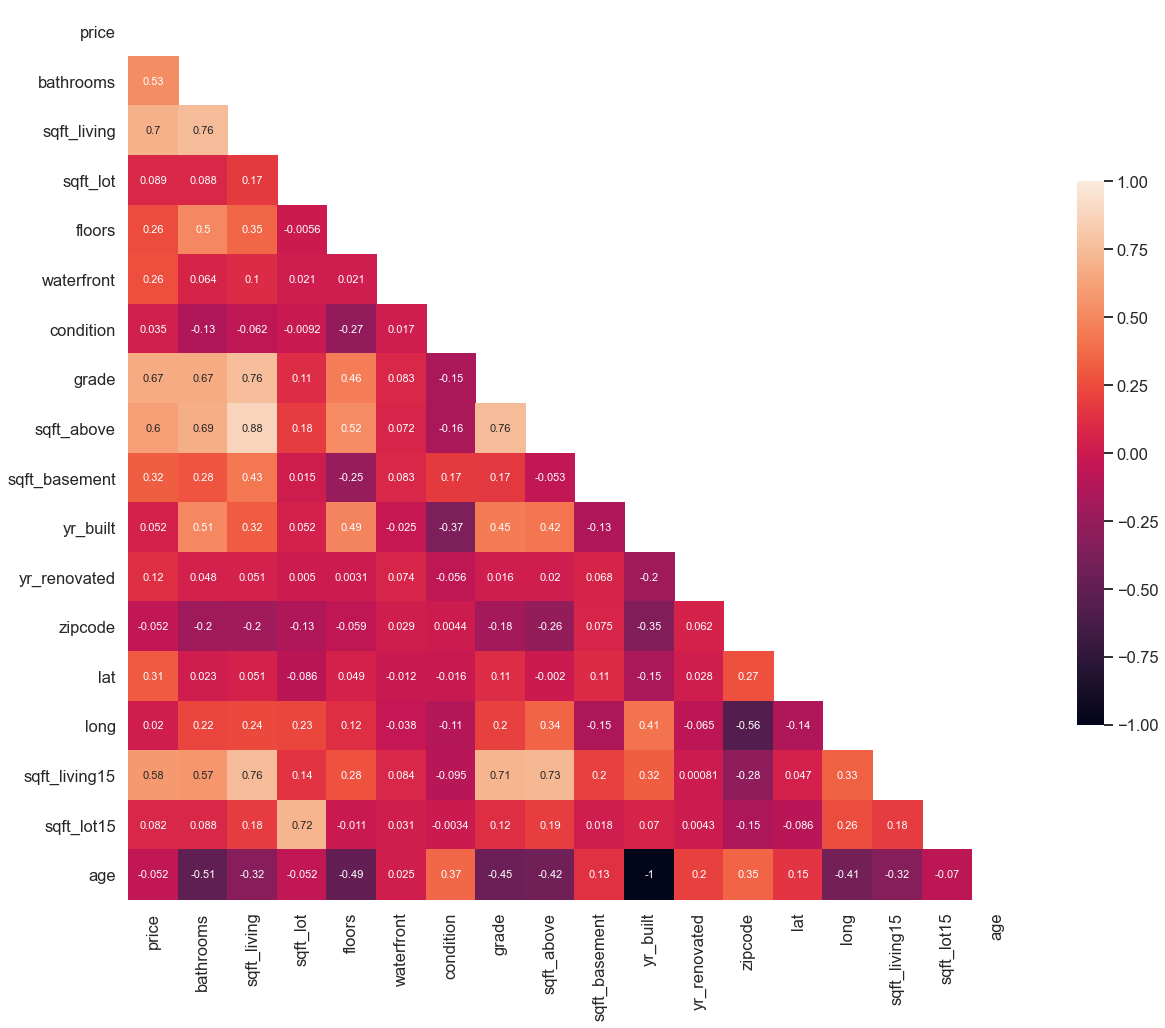

In [1777]:
#heatmap for all the required features
mask = np.zeros_like(kc_house.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (20, 20))
    ax = sns.heatmap(kc_house.corr(), 
                     annot = True,
                     annot_kws={"size": 11},
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = mask, 
                     vmax = 1,
                     vmin = -1,
                     square = True)

In [1778]:
#save
plt.savefig('./Data & Figures/heatmap')

<Figure size 432x288 with 0 Axes>

We see here that 'sqft_lot' (0.089), 'sqft_lot15' (0.082), and 'yr_renovated' (0.12) has very low correlation with 'price'. We want to aim for at least a 0.2 correlation. Hence we will eliminate these features from our model.

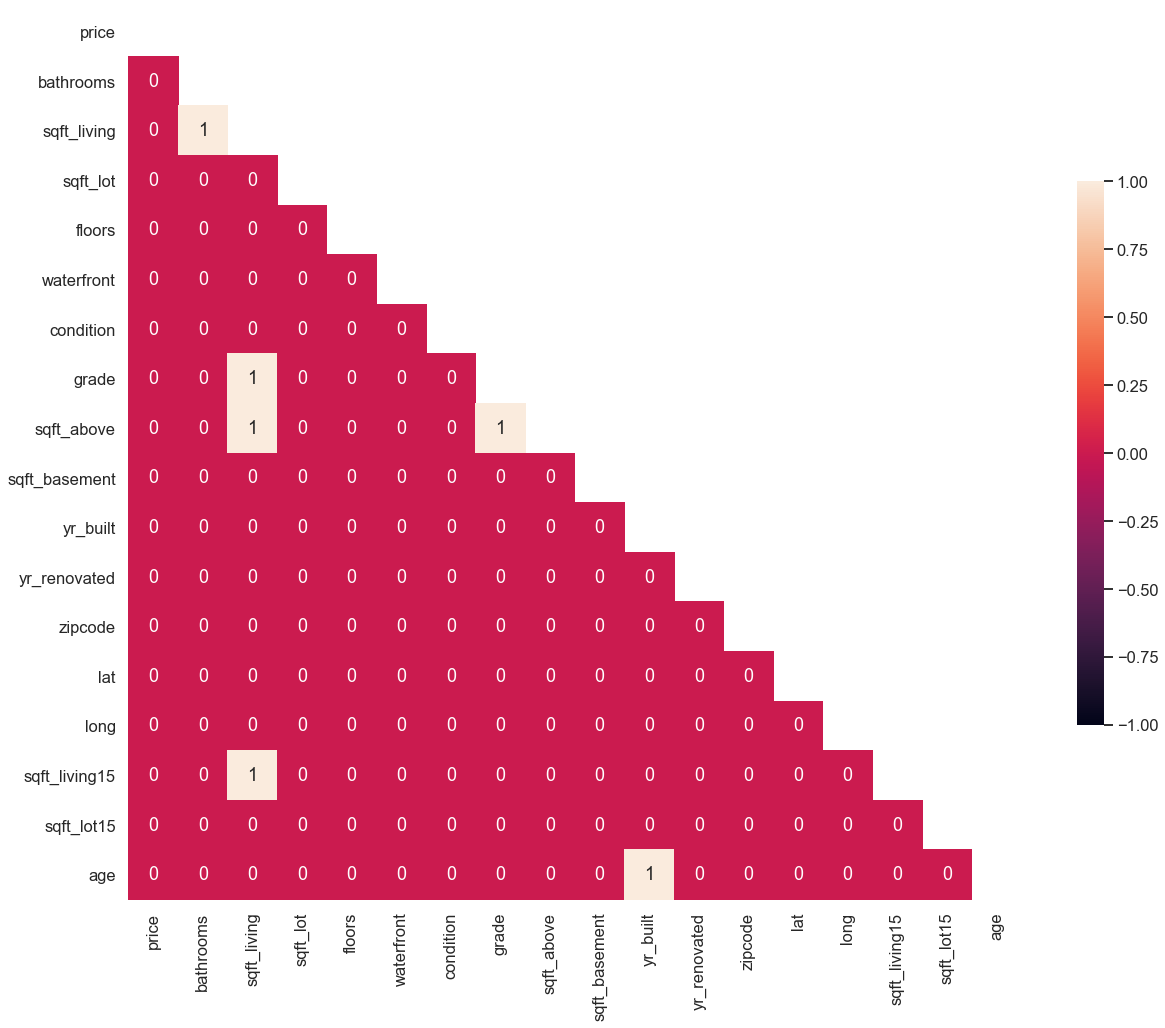

In [1779]:
#check for multicollinearity
mask = np.zeros_like(abs(kc_house.corr()) > 0.75)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (20, 20))
    ax = sns.heatmap(abs(kc_house.corr()) > 0.75, 
                     annot = True, 
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = mask, 
                     vmax = 1,
                     vmin = -1,
                     square = True)

In [1780]:
#save
plt.savefig('./Data & Figures/multicollinearity_heatmap')

<Figure size 432x288 with 0 Axes>

**Observation:** We see multicollinearity between: 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade'

We will examine which of these features are to keep and which are to drop to avoid multicollinearity

In [1781]:
#create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.
kc_house_corr = kc_house.corr().abs().stack().reset_index().sort_values(0, ascending = False)
kc_house_corr.head()

level_0     level_1    0
0         price       price  1.0
190    yr_built    yr_built  1.0
57     sqft_lot    sqft_lot  1.0
76       floors      floors  1.0
95   waterfront  waterfront  1.0

In [1782]:
kc_house_corr['pairs'] = list(zip(kc_house_corr['level_0'], kc_house_corr['level_1']))
kc_house_corr.head()

level_0     level_1    0                     pairs
0         price       price  1.0            (price, price)
190    yr_built    yr_built  1.0      (yr_built, yr_built)
57     sqft_lot    sqft_lot  1.0      (sqft_lot, sqft_lot)
76       floors      floors  1.0          (floors, floors)
95   waterfront  waterfront  1.0  (waterfront, waterfront)

In [1783]:
kc_house_corr.set_index(['pairs'], inplace = True)
kc_house_corr.head()

level_0     level_1    0
pairs                                                
(price, price)                 price       price  1.0
(yr_built, yr_built)        yr_built    yr_built  1.0
(sqft_lot, sqft_lot)        sqft_lot    sqft_lot  1.0
(floors, floors)              floors      floors  1.0
(waterfront, waterfront)  waterfront  waterfront  1.0

In [1784]:
kc_house_corr.drop(columns = ['level_0', 'level_1'], inplace = True)
kc_house_corr.head()

0
pairs                        
(price, price)            1.0
(yr_built, yr_built)      1.0
(sqft_lot, sqft_lot)      1.0
(floors, floors)          1.0
(waterfront, waterfront)  1.0

In [1785]:
#add correlation column
kc_house_corr.columns = ['cc']
kc_house_corr.head()

cc
pairs                        
(price, price)            1.0
(yr_built, yr_built)      1.0
(sqft_lot, sqft_lot)      1.0
(floors, floors)          1.0
(waterfront, waterfront)  1.0

In [1786]:
kc_house_corr.drop_duplicates(inplace = True)

In [1787]:
#correlations over .75, but less than 1. = multicollinarity
kc_house_corr[(kc_house_corr['cc'] > 0.75) & (kc_house_corr['cc'] < 1)]
kc_house_corr.head(6)

cc
pairs                                 
(price, price)                1.000000
(sqft_living, sqft_above)     0.876533
(sqft_living, grade)          0.762477
(sqft_above, grade)           0.756221
(sqft_living, sqft_living15)  0.756186
(bathrooms, sqft_living)      0.755522

In [1788]:
#compare features' correlation with 'price'
kc_house[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade', 'price']].corr()

sqft_living  sqft_above  sqft_living15  bathrooms     grade  \
sqft_living       1.000000    0.876533       0.756186   0.755522  0.762477   
sqft_above        0.876533    1.000000       0.731887   0.686328  0.756221   
sqft_living15     0.756186    0.731887       1.000000   0.569453  0.713178   
bathrooms         0.755522    0.686328       0.569453   1.000000  0.665587   
grade             0.762477    0.756221       0.713178   0.665587  1.000000   
price             0.701651    0.604916       0.584227   0.525859  0.667393   

                  price  
sqft_living    0.701651  
sqft_above     0.604916  
sqft_living15  0.584227  
bathrooms      0.525859  
grade          0.667393  
price          1.000000

We see that that there are 5 pairs of highly correlated features and the correct approach is to drop one variable from each pair.

We also see here that all 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade' features are all highly correlated with 'price' and at this point we don't want to drop any of these features. We can built different models for each of these features.

## Features Selection

In [1790]:
continuous = ['price', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
categoricals = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

In [ ]:
continuous = 
categoricals = 

In [1791]:
kc_cont = kc_house[continuous]
kc_cat = kc_house[categoricals]

## Prepare Continuous Data 

### Log Transform

In [ ]:
log_names = [f'{column}_log' for column in ames_cont.columns]

kc_log = np.log(kc_cont)
kc_log.columns = log_names
kc_log.hist(figsize = (10, 10), bins = 'auto')
fig.tight_layout();

### Normalization

In [1798]:
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kc_cont_norm = kc_cont.apply(normalize)

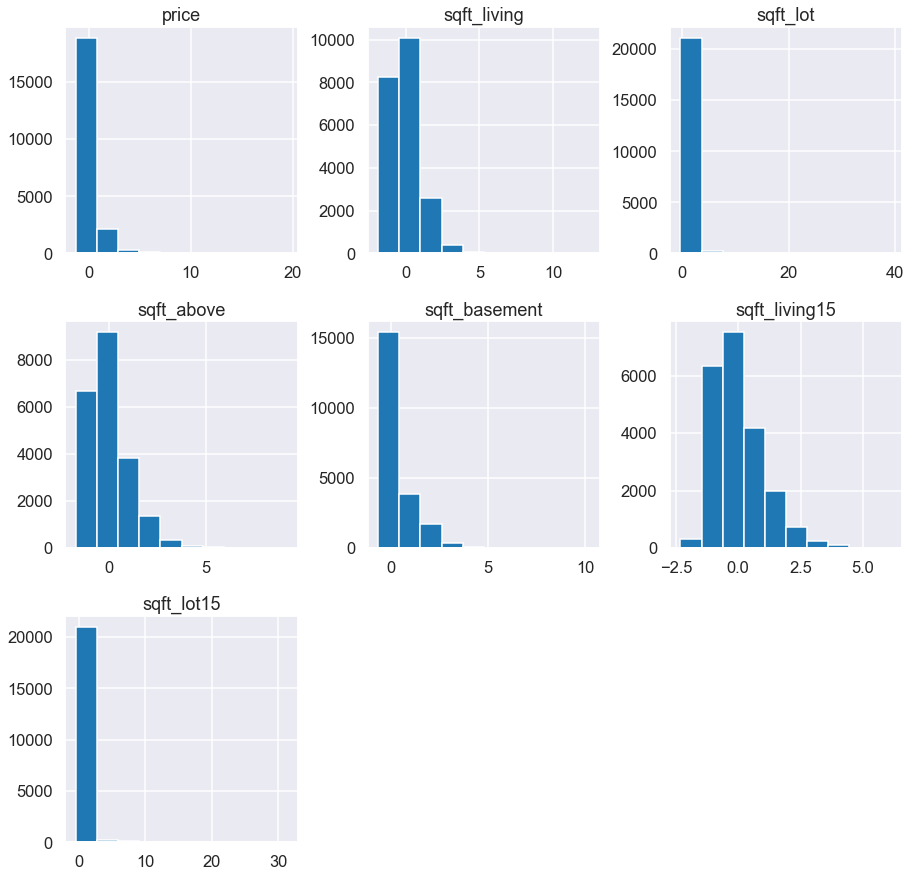

In [1795]:
#plot the new normalized data
kc_cont_norm.hist(figsize = (15, 15));

## Prepare Categorical Data with One Hot Encoding

**'floor', 'waterfront', 'view', 'condition'** as string since we will use One Hot Encoding on them later

In [ ]:
# Cast to a numeric type then to string type
kc_house['floors'] = kc_house['floors'].astype('str')
kc_house['waterfront'] = kc_house['waterfront'].astype('str')
kc_house['condition'] = kc_house['condition'].astype('float64').astype('str')
kc_house['yr_renovated'] = kc_house['yr_renovated'].astype('float64').astype('str')

print(kc_house['floors'].dtypes)
print(kc_house['waterfront'].dtypes)
print(kc_house['condition'].dtypes)
print(kc_house['yr_renovated'].dtypes)

In [ ]:
#get dummies
basement_dummies = pd.get_dummies(kc_house['basement'], prefix = 'base')
floors_dummies = pd.get_dummies(kc_house['floors'], prefix = 'floors')
water_dummies = pd.get_dummies(kc_house['waterfront'], prefix = 'water')
condition_dummies = pd.get_dummies(kc_house['condition'], prefix = 'cond')
renovated_dummies = pd.get_dummies(kc_house['yr_renovated'], prefix = 'reno')

In [ ]:
#drop columns 
kc_house.drop(['basement', 'floors', 'condition','waterfront', 'yr_renovated'], axis=1, inplace = True)

In [ ]:
#merge dummies columns
kc_house = pd.concat([kc_house, basement_dummies, floors_dummies, water_dummies, condition_dummies, renovated_dummies], axis=1)

In [ ]:
# one hot encode categoricals
kc_ohe = pd.get_dummies(kc_house[categoricals], prefix=categoricals, drop_first=True)

## Final Dataframe

In [ ]:
preprocessed = pd.concat([kc_log_norm, kc_ohe], axis=1)

X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']